<h1 style="text-align:center;font-size:50px;" > Microsoft Malware detection </h1>

<h1>1.0 Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should finish in a few seconds or a minute.

<h1>2.0 Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3.0 Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize 
from nltk.util import ngrams
import h5py
import copy
%matplotlib notebook
%matplotlib inline
from datetime import datetime

In [2]:
pwd

'/home/sundareshan_kn/Microsoft malware detection'

In [3]:
# setting path
par_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
dir_path = os.path.join(par_path, 'Microsoft malware detection')
dir_path

'/home/sundareshan_kn/Microsoft malware detection'

In [4]:
par_path

'/home/sundareshan_kn'

In [11]:
#separating byte files and asm files and moving byte files to a folder

source = os.path.join(dir_path)
destination = os.path.join(dir_path, 'byteFiles')
if not os.path.isdir(destination):
    os.makedirs(destination)
if os.path.isdir(source):
    #os.rename(source,os.path.join(dir_path,'asmFiles'))
    #source=os.path.join(dir_path,'asmFiles')
    files = os.listdir(source)
    for file in files:
        if (file.endswith("bytes")):
            shutil.move(os.path.join(source,file),destination)

In [12]:
#moving asm files

source = os.path.join(dir_path)
destination = os.path.join(dir_path, 'asmFiles')
if not os.path.isdir(destination):
    os.makedirs(destination)
if os.path.isdir(source):
    files = os.listdir(source)
    for file in files:
        if (file.endswith("asm")):
            shutil.move(os.path.join(source,file),destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

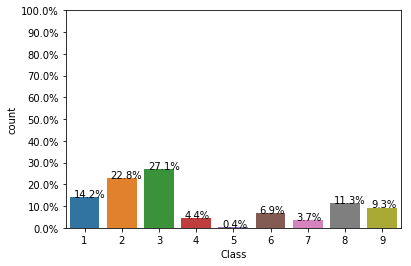

In [17]:
Y=pd.read_csv(os.path.join(dir_path,"trainLabels.csv"))
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [18]:
Y.head(5)

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [19]:
Y.Class.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [20]:
#file sizes of byte files

files=os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat(os.path.join(dir_path,'byteFiles', file))
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      8  gCQ70meuzrYAFaWDxZJv  2.024902
1      6  I2QaRs1y4TmZVLwWCPv7  0.708008
2      1  DoEYOjCZuGA3x4JSgW5d  0.736328
3      2  4iNJaXWGlkyVroOfHMqg  8.425293
4      1  ilogAd4QsU38IFBcuwDp  6.315430


In [24]:
print(os.stat(os.path.join(dir_path,'byteFiles','0A32eTdBKayjCWhZqDOQ.bytes')))

os.stat_result(st_mode=33188, st_ino=2371261, st_dev=2049, st_nlink=1, st_uid=1001, st_gid=1002, st_size=4356052, st_atime=1576236301, st_mtime=1422507600, st_ctime=1576238836)


In [25]:
type(data_size_byte)

pandas.core.frame.DataFrame

In [26]:
data_size_byte.to_csv('data_size_byte.csv')

In [5]:
data_size_byte= pd.read_csv('data_size_byte.csv', index_col=0)

In [6]:
data_size_byte.head()

Class                    ID      size
0      8  gCQ70meuzrYAFaWDxZJv  2.024902
1      6  I2QaRs1y4TmZVLwWCPv7  0.708008
2      1  DoEYOjCZuGA3x4JSgW5d  0.736328
3      2  4iNJaXWGlkyVroOfHMqg  8.425293
4      1  ilogAd4QsU38IFBcuwDp  6.315430

<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

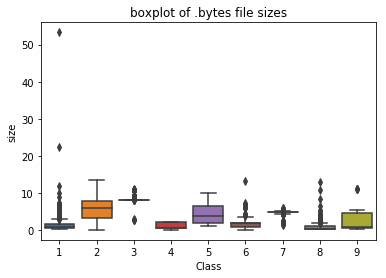

In [27]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [28]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open(os.path.join(dir_path,'byteFiles', file+".txt"), 'w+')
        file += '.bytes'
        with open(os.path.join(dir_path,'byteFiles',file),"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file)
        text_file.close()

<h1 style="text-align:center;font-size:35px;" > Modeling with .byte files </h1>

# 4.0 Extracting unigram & bi-gram byte features

## 4.1 Bi-gram vocabulary/features

In [5]:
def get_bigrams(file):
    temp_list = []
    with open(os.path.join('byteFiles', file),"r") as byte_file:
        all_lines = []
        for lines in byte_file:
            line=lines.rstrip().split(" ")
            all_lines.extend(line)
            # unigrams
        for hex_code in line:      
            temp_list.append(hex_code.lower())
        temp_list = list(set(temp_list))
        
        # bigrams
        bi_g = [' '.join(x) for x in list(ngrams(all_lines, 2))]
        for hex_code in bi_g:
                temp_list.append(hex_code.lower())
        temp_list = list(set(temp_list))
        
    return temp_list

In [6]:
files = os.listdir(os.path.join(dir_path, 'byteFiles'))
bigram_vocab = []
for f in tqdm(files):
    bigram_vocab.extend(get_bigrams(f))
    bigram_vocab = list(set(bigram_vocab))
print('Number of distict bigrams:',len(bigram_vocab))

100%|██████████| 10868/10868 [4:27:41<00:00,  1.48s/it] 

Number of distict bigrams: 66183


In [7]:
type(bigram_vocab)

list

In [8]:
#saving the bigram vocab list
np.save('bigram_vocab',bigram_vocab)

In [13]:
with open(os.path.join(dir_path, 'uni_bigram_keys.pkl'), 'wb') as big:
    pickle.dump(bigram_vocab, big)

In [12]:
bigram_vocab[0]

'0a 90'

In [21]:
bigram_vocab = np.load('bigram_vocab.npy')

In [25]:
len(bigram_vocab)

66183

In [5]:
with open(os.path.join(dir_path, 'uni_bigram_keys.pkl'), 'rb') as big:
    bigram_vocab = pickle.load(big)

In [6]:
type(bigram_vocab)

list

## 4.2 Combining unigrams & bigrams vocab

In [30]:
#hexagonal codes

s= "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,\
27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,\
4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,\
77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,\
9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,\
c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,\
ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [31]:
# converting string of codes into a list
unigram_vocab = s.split(",")

In [32]:
print(unigram_vocab)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0a', '0b', '0c', '0d', '0e', '0f', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1a', '1b', '1c', '1d', '1e', '1f', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2a', '2b', '2c', '2d', '2e', '2f', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3a', '3b', '3c', '3d', '3e', '3f', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '4a', '4b', '4c', '4d', '4e', '4f', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '5a', '5b', '5c', '5d', '5e', '5f', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '6a', '6b', '6c', '6d', '6e', '6f', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '7a', '7b', '7c', '7d', '7e', '7f', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '8a', '8b', '8c', '8d', '8e', '8f', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '9a', '9b', '9c', '9d', '9e', '9f', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6

In [26]:
len(unigram_vocab)

257

In [33]:
#bigram_vocab+= unigram_vocab
bigram_vocab.extend(unigram_vocab)
print("Total number of unigram & bigram features: ",len(bigram_vocab))

Total number of unigram & bigram features:  66440


In [35]:
len(bigram_vocab)

66440

In [36]:
with open(os.path.join(dir_path, 'final_vocab.pkl'), 'wb') as v:
    pickle.dump(bigram_vocab, v)

In [7]:
with open(os.path.join(dir_path, 'final_vocab.pkl'), 'rb') as v:
    bigram_vocab = pickle.load(v)

In [8]:
len(bigram_vocab)

66440

In [9]:
### Creating a dictionary with keys as vocabulary  values as zeros. This dictionary will be used during BOW
all_vocab_dict = dict(zip(bigram_vocab, [0]*len(bigram_vocab)))

## 4.3 BOW(unigram+ bi-gram)

In [10]:
# Ref: https://github.com/be-shekhar/microsoft-malware-detection
files = os.listdir(os.path.join(dir_path, 'byteFiles'))
filenames2=[]

if os.path.exists(os.path.join(dir_path, 'byte_features.csv')):
    os.remove(os.path.join(dir_path, 'byte_features.csv'))

byte_feature_file=open(os.path.join(dir_path, 'byte_features.csv'),'w+')

byte_feature_file.write("ID,"+','.join(bigram_vocab))
byte_feature_file.write("\n")

for file in tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open(os.path.join(dir_path, 'byteFiles', file),"r") as byte_flie:
            byte_feature_file.write(file.split(".")[0]+",")
            temp = all_vocab_dict.copy()
            all_lines = []
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                all_lines.extend(line)
            # unigrams
            for hex_code in all_lines:
                temp[hex_code.lower()] += 1
            # bigrams
            bi_g = [' '.join(x) for x in list(ngrams(all_lines, 2))]
            for hex_code_bi in bi_g:
                temp[hex_code_bi.lower()] += 1
                
            features = [str(temp[x]) for x in bigram_vocab]
            byte_feature_file.write(','.join(features))
            byte_feature_file.write("\n")
            del temp

byte_feature_file.close()

100%|██████████| 10868/10868 [5:23:34<00:00,  1.79s/it]  


In [9]:
byte_features=pd.read_csv("byte_features.csv")
byte_features.shape

(10868, 66441)

In [10]:
byte_features.head()

ID  0a 90  31 27  f9 91  c7 35  ac 0c  0a 7e  04 74  \
0  gyZztfseanvGp5uX2qix      2      1      0      0      0      2      5   
1  HSpxv7XiuwNj2ceELTnJ      0      0      0      0      1      1     18   
2  64FZCyUcjXxLNv1K8Bm3      1    110      1      0      0      0     42   
3  H7k4tXfrKFIZN1GqnYUw     17     14      9     10     12     13     12   
4  AjhW6ifgDC38ObQcJPa5      1      3      3      3      0      1     25   

   96 2b  6d 01  ...    f7    f8  f9.1    fa    fb  fc.1  fd.1  fe.1   ff.1  \
0      0      0  ...   417   417   236   272   206   386   161   489    845   
1      1      1  ...   546  6841   489   312   448  8971   561  8354  54685   
2      0     67  ...  1914  2473  1759  1310  1675  2420  1807  2290  29074   
3      9     14  ...  3085  3068  3101  3083  3163  3165  3048  3076   5211   
4      1      2  ...   507   899   465   362   387   830   423   708   7372   

      ??.1  
0      204  
1     8076  
2    11108  
3  1536156  
4     9004  

[5 rows x 66441 columns]

In [12]:
result = pd.merge(byte_features, data_size_byte,on='ID', how='left')
result.head()

ID  0a 90  31 27  f9 91  c7 35  ac 0c  0a 7e  04 74  \
0  gyZztfseanvGp5uX2qix      2      1      0      0      0      2      5   
1  HSpxv7XiuwNj2ceELTnJ      0      0      0      0      1      1     18   
2  64FZCyUcjXxLNv1K8Bm3      1    110      1      0      0      0     42   
3  H7k4tXfrKFIZN1GqnYUw     17     14      9     10     12     13     12   
4  AjhW6ifgDC38ObQcJPa5      1      3      3      3      0      1     25   

   96 2b  6d 01  ...  f9.1    fa    fb  fc.1  fd.1  fe.1   ff.1     ??.1  \
0      0      0  ...   236   272   206   386   161   489    845      204   
1      1      1  ...   489   312   448  8971   561  8354  54685     8076   
2      0     67  ...  1759  1310  1675  2420  1807  2290  29074    11108   
3      9     14  ...  3101  3083  3163  3165  3048  3076   5211  1536156   
4      1      2  ...   465   362   387   830   423   708   7372     9004   

   Class      size  
0      6  0.566406  
1      2  7.419922  
2      2  4.237413  
3      3  8.099609  
4      1  0.722168  

[5 rows x 66443 columns]

In [13]:
result.to_csv('uni_bi_result.csv')

## 4.4 Converting the dataframe to sparse matrix due to memory constraints

In [28]:
c_z= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=['ID','Class','size'])
c_z.head()

ID  Class      size
0  gyZztfseanvGp5uX2qix      6  0.566406
1  HSpxv7XiuwNj2ceELTnJ      2  7.419922
2  64FZCyUcjXxLNv1K8Bm3      2  4.237413
3  H7k4tXfrKFIZN1GqnYUw      3  8.099609
4  AjhW6ifgDC38ObQcJPa5      1  0.722168

In [9]:
c_z.to_csv('c_z.csv')

In [26]:
c_z= pd.read_csv('c_z.csv')
c_z.head()

Unnamed: 0                    ID  Class      size
0           0  gyZztfseanvGp5uX2qix      6  0.566406
1           1  HSpxv7XiuwNj2ceELTnJ      2  7.419922
2           2  64FZCyUcjXxLNv1K8Bm3      2  4.237413
3           3  H7k4tXfrKFIZN1GqnYUw      3  8.099609
4           4  AjhW6ifgDC38ObQcJPa5      1  0.722168

In [29]:
ID= c_z['ID'].values

In [32]:
ID

array(['gyZztfseanvGp5uX2qix', 'HSpxv7XiuwNj2ceELTnJ',
       '64FZCyUcjXxLNv1K8Bm3', ..., 'gBceKDhWdI6jfzpsMNm5',
       'ENo8Xj5AOMHw2LDQuYB3', 'cxCflUQEJT7mNFg08KpM'], dtype=object)

In [33]:
np.save('ID',ID)

In [31]:
data_y= c_z.Class.values

In [37]:
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [35]:
file_size= c_z['size'].values

In [36]:
file_size

array([ 0.56640625,  7.41992188,  4.23741341, ..., 10.80419922,
        0.97705078,  6.00390625])

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
file_size_norm = min_max_scaler.fit_transform(file_size.reshape(-1,1))
file_size_norm

array([[0.00862913],
       [0.1374754 ],
       [0.07764416],
       ...,
       [0.2010999 ],
       [0.01634926],
       [0.11085427]])

In [40]:
np.save('data_y',data_y)
np.save('size',file_size_norm)

In [5]:
data_y= np.load('data_y.npy')

In [6]:
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [5]:
df1= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=[col for col in range(1,10001)])
df1.head()

0a 90  31 27  f9 91  c7 35  ac 0c  0a 7e  04 74  96 2b  \
ID                                                                             
gyZztfseanvGp5uX2qix      2      1      0      0      0      2      5      0   
HSpxv7XiuwNj2ceELTnJ      0      0      0      0      1      1     18      1   
64FZCyUcjXxLNv1K8Bm3      1    110      1      0      0      0     42      0   
H7k4tXfrKFIZN1GqnYUw     17     14      9     10     12     13     12      9   
AjhW6ifgDC38ObQcJPa5      1      3      3      3      0      1     25      1   

                      6d 01  08 ee  ...  34 8a  b6 0f  9d 89  d1 8f  92 c5  \
ID                                  ...                                      
gyZztfseanvGp5uX2qix      0      6  ...      1      0      3      0      2   
HSpxv7XiuwNj2ceELTnJ      1      0  ...      2   1811      1      0      2   
64FZCyUcjXxLNv1K8Bm3     67      0  ...      1      1      1      0      8   
H7k4tXfrKFIZN1GqnYUw     14     20  ...      8     14     11     12     15   
AjhW6ifgDC38ObQcJPa5      2      0  ...      2      1      0      0      0   

                      8b 50  33 31  73 16  fb ba  f5 7f  
ID                                                       
gyZztfseanvGp5uX2qix      1      3      2      1      2  
HSpxv7XiuwNj2ceELTnJ     18      1      0      0      0  
64FZCyUcjXxLNv1K8Bm3     47    187      1      0      0  
H7k4tXfrKFIZN1GqnYUw     21     15     12     14      8  
AjhW6ifgDC38ObQcJPa5     23      5      0      3      2  

[5 rows x 9999 columns]

In [6]:
import scipy
matrix1= scipy.sparse.csr_matrix(df1.values)

In [7]:
matrix1.shape

(10868, 9999)

In [9]:
from scipy import sparse
sparse.save_npz("matrix1.npz", matrix1)

In [14]:
df2= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=[col for col in range(10001,20001)])
df2.head()

f0 9f  2c 7d  6c a2  40 04  8c 3c  d9 d4  0f 3e  af ee  71 cc  cf 9b  ...  \
0     12      5      3      3      2      4      4      2      4      0  ...   
1      0      0      0     14      0      0      0      0      0      7  ...   
2      2      0      2     80      0      0      0      0      1      0  ...   
3      6     11     19     18      7      8     16      6     16     10  ...   
4      1      0      0     28      4      2      4      1      1      1  ...   

   fb de  d0 10  eb 6f  bc 18  02 93  c4 25  9d fa  6c 8c  e3 b1  1f 0d  
0      0      0      0      1      0      0      1      1      6      0  
1      0      0   5234      1      0      2      0     28      0      0  
2      1     90      2      0     79      2      1      0      0      0  
3     10     12      8     12      7     12      9      5     11     10  
4      1      1      3      0      2      3      2      0      3      2  

[5 rows x 10000 columns]

In [15]:
matrix2= scipy.sparse.csr_matrix(df2.values)
matrix2.shape

(10868, 10000)

In [16]:
sparse.save_npz("matrix2.npz", matrix2)

In [17]:
matrix2

<10868x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 76433603 stored elements in Compressed Sparse Row format>

In [18]:
df3= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=[col for col in range(20001,40001)])
df3.head()

9c e5  9e ee  10 69  04 3f  e6 44  13 0e  7e 40  aa 0e  d7 4a  63 21  ...  \
0      1      0      5      2      1      1      2      0      0      2  ...   
1      2     14      0      3      0      1      1      0      1      0  ...   
2      0      0     73      3      0    118      2      0      1    112  ...   
3     14     10     12     15     12      4      9     16     10     14  ...   
4      0      0      3      2      0      2      3      0      2      0  ...   

   2f b1  e0 08  5a a2  17 97  36 46  6d 0b  cb d8  0c e8  06 36  a1 48  
0      1      0      1      0      1      1      0      3      6      1  
1      0      4      0      0      1      0      0     34      0     16  
2      0      7      0      0      0      0      1     55      0      2  
3     12     15     14      7     12     10      9      9     19     12  
4      0      6      3      0      2      0      0     36      1      2  

[5 rows x 20000 columns]

In [19]:
matrix3= scipy.sparse.csr_matrix(df3.values)
matrix3.shape

(10868, 20000)

In [20]:
sparse.save_npz("matrix3.npz", matrix3)

In [21]:
#concatenate the first 3 matrices
from scipy.sparse import hstack
m_40k= hstack((matrix1,matrix2,matrix3))
m_40k.shape

(10868, 39999)

In [22]:
sparse.save_npz("m_40k.npz", m_40k)

In [5]:
df4= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=[col for col in range(40001,60001)])
df4.head()

d6 79  c3 0d  c7 d7  0b 69  50 12  38 22  e5 dd  5c d4  6a 27  27 dc  ...  \
0      0      1      1      1      2      3      0      0      5      0  ...   
1      2      1      1      1      0      3      1      0      1      0  ...   
2      0      3      0      0    100    101      0      0      4      0  ...   
3     10     12     14     14     15     13     16     11     14     10  ...   
4      1      3      0      2      1      5      2      1      1      0  ...   

   3d ef  72 c4  4e 8e  aa 0d  f4 3a  81 9c  b7 f0  8a 01  28 78  d0 b5  
0      1      0      1      0      0      2      2      3      2      1  
1      0      1      0      0      0      0      1      2      0      1  
2      1      0      0      0      1      0      1    101      0     17  
3      7     13     12     15      9     12     15     11      4     11  
4      1      1      2      0      1      1      2      5      1      1  

[5 rows x 20000 columns]

In [7]:
import scipy
matrix4= scipy.sparse.csr_matrix(df4.values)
matrix4.shape

(10868, 20000)

In [8]:
from scipy import sparse
sparse.save_npz("matrix4.npz", matrix4)

In [9]:
df5= pd.read_csv('uni_bi_result.csv',index_col=False, usecols=[col for col in range(60001,66442)])
df5.head()

ee 1c  df e2  68 df  1f 5c  40 1d  bb 2c  39 d2  4c fc  7c 2e  b1 ae  ...  \
0      2      0      0      3      5      4      1      1      5      1  ...   
1      1      0      0      2      0      2      0      0      1      0  ...   
2      0      6      1      0      0      0      0      0      2      5  ...   
3     11     12     15     10      9     14     13     12     16     11  ...   
4      3      2      0      1      0      0      0      1      1      0  ...   

     f7    f8  f9.1    fa    fb  fc.1  fd.1  fe.1   ff.1     ??.1  
0   417   417   236   272   206   386   161   489    845      204  
1   546  6841   489   312   448  8971   561  8354  54685     8076  
2  1914  2473  1759  1310  1675  2420  1807  2290  29074    11108  
3  3085  3068  3101  3083  3163  3165  3048  3076   5211  1536156  
4   507   899   465   362   387   830   423   708   7372     9004  

[5 rows x 6441 columns]

In [10]:
import scipy
matrix5= scipy.sparse.csr_matrix(df5.values)
matrix5.shape

(10868, 6441)

In [11]:
from scipy import sparse
sparse.save_npz("matrix5.npz", matrix5)

In [12]:
m_40k= sparse.load_npz("m_40k.npz")

In [13]:
m_40k.shape

(10868, 39999)

In [14]:
from scipy.sparse import hstack
final_matrix = hstack((m_40k,matrix4,matrix5))
final_matrix.shape

(10868, 66440)

In [15]:
from scipy import sparse
sparse.save_npz("final_matrix.npz", final_matrix)

In [5]:
from scipy import sparse
final_matrix= sparse.load_npz("final_matrix.npz")
final_matrix.shape

(10868, 66440)

# 5.0 Normalizing all column features

In [6]:
#https://stackoverflow.com/questions/12305021/efficient-way-to-normalize-a-scipy-sparse-matrix/12396922
from sklearn.preprocessing import normalize
matrix_normalized = normalize(final_matrix, norm='l1', axis=0)

In [7]:
matrix_normalized.shape

(10868, 66440)

# 6.0 Selecting 500 most important features out of 66440 features using Random forest classifier

Most of the features in a sparse matrix may not be useful/important. Hence I'm picking the top 500 features for further analysis. Also, the compuatational requirement also reduces when models are applied on important features.

In [14]:
def imp_features(data, n, y):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, y)
    imp_feature_indices = np.argsort(rf.feature_importances_)[::-1]
    return imp_feature_indices[:n]

In [8]:
with open(os.path.join(dir_path, 'final_vocab.pkl'), 'rb') as v:
    bigram_vocab = pickle.load(v)

In [9]:
len(bigram_vocab)

66440

In [18]:
type(bigram_vocab)

list

In [13]:
#loading classes
data_y= np.load('data_y.npy')
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [17]:
indices = imp_features(matrix_normalized, 500, data_y)
len(indices)

500

In [19]:
top_500 = np.zeros((10868, 0))
for i in indices:
    imp_500 = matrix_normalized[:, i].todense()
    top_500 = np.hstack([top_500, imp_500])

In [20]:
top_500.shape

(10868, 500)

In [21]:
# storing sparse matrix into a dataframe
df= pd.SparseDataFrame(top_500, columns = np.take(bigram_vocab, indices))
df.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...     87 00     2e 73     ff 15     6f 00  \
0  0.000015  0.000002  0.003440  ...  0.000020  0.000016  0.000035  0.000002   
1  0.000043  0.000221  0.000006  ...  0.000012  0.000000  0.000081  0.006148   
2  0.000094  0.000103  0.000012  ...  0.000177  0.000016  0.000097  0.000056   
3  0.000169  0.000024  0.000057  ...  0.000024  0.000097  0.000011  0.000012   
4  0.000020  0.000000  0.000555  ...  0.000012  0.000065  0.000137  0.000095   

      00 ba     f9 24     10 85     d2 00        07     ff 01  
0  0.000005  0.000039  0.000002  0.000003  0.000016  0.000012  
1  0.000024  0.000000  0.000005  0.000001  0.000166  0.000067  
2  0.000076  0.000000  0.000194  0.000125  0.000061  0.000390  
3  0.000017  0.000207  0.000015  0.000020  0.000076  0.000019  
4  0.000037  0.000013  0.000013  0.000093  0.000017  0.000021  

[5 rows x 500 columns]

In [35]:
df.to_csv('df_backup.csv')

In [53]:
#Adding size feature(normalized) of the byte files & ID column to the above dataframe
file_size= np.load('size.npy')
file_size

array([[0.00862913],
       [0.1374754 ],
       [0.07764416],
       ...,
       [0.2010999 ],
       [0.01634926],
       [0.11085427]])

In [54]:
file_size.shape

(10868, 1)

In [55]:
file_size= file_size.flatten()

In [56]:
type(file_size)

numpy.ndarray

In [57]:
file_size

array([0.00862913, 0.1374754 , 0.07764416, ..., 0.2010999 , 0.01634926,
       0.11085427])

In [34]:
ID

array(['gyZztfseanvGp5uX2qix', 'HSpxv7XiuwNj2ceELTnJ',
       '64FZCyUcjXxLNv1K8Bm3', ..., 'gBceKDhWdI6jfzpsMNm5',
       'ENo8Xj5AOMHw2LDQuYB3', 'cxCflUQEJT7mNFg08KpM'], dtype=object)

In [37]:
df['ID']= ID

In [38]:
df.head(2)

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   

         a4     ff 9e     58 50  ...     2e 73     ff 15     6f 00     00 ba  \
0  0.000015  0.000002  0.003440  ...  0.000016  0.000035  0.000002  0.000005   
1  0.000043  0.000221  0.000006  ...  0.000000  0.000081  0.006148  0.000024   

      f9 24     10 85     d2 00        07     ff 01                    ID  
0  0.000039  0.000002  0.000003  0.000016  0.000012  gyZztfseanvGp5uX2qix  
1  0.000000  0.000005  0.000001  0.000166  0.000067  HSpxv7XiuwNj2ceELTnJ  

[2 rows x 501 columns]

In [58]:
df['size']= file_size

In [60]:
df.head(5)

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...     ff 15     6f 00     00 ba     f9 24  \
0  0.000015  0.000002  0.003440  ...  0.000035  0.000002  0.000005  0.000039   
1  0.000043  0.000221  0.000006  ...  0.000081  0.006148  0.000024  0.000000   
2  0.000094  0.000103  0.000012  ...  0.000097  0.000056  0.000076  0.000000   
3  0.000169  0.000024  0.000057  ...  0.000011  0.000012  0.000017  0.000207   
4  0.000020  0.000000  0.000555  ...  0.000137  0.000095  0.000037  0.000013   

      10 85     d2 00        07     ff 01                    ID      size  
0  0.000002  0.000003  0.000016  0.000012  gyZztfseanvGp5uX2qix  0.008629  
1  0.000005  0.000001  0.000166  0.000067  HSpxv7XiuwNj2ceELTnJ  0.137475  
2  0.000194  0.000125  0.000061  0.000390  64FZCyUcjXxLNv1K8Bm3  0.077644  
3  0.000015  0.000020  0.000076  0.000019  H7k4tXfrKFIZN1GqnYUw  0.150254  
4  0.000013  0.000093  0.000017  0.000021  AjhW6ifgDC38ObQcJPa5  0.011557  

[5 rows x 502 columns]

In [61]:
df.shape

(10868, 502)

In [62]:
df.to_csv('final_result.csv')

In [50]:
result= pd.read_csv('final_result.csv', index_col=0)
result.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...     ff 15     6f 00     00 ba     f9 24  \
0  0.000015  0.000002  0.003440  ...  0.000035  0.000002  0.000005  0.000039   
1  0.000043  0.000221  0.000006  ...  0.000081  0.006148  0.000024  0.000000   
2  0.000094  0.000103  0.000012  ...  0.000097  0.000056  0.000076  0.000000   
3  0.000169  0.000024  0.000057  ...  0.000011  0.000012  0.000017  0.000207   
4  0.000020  0.000000  0.000555  ...  0.000137  0.000095  0.000037  0.000013   

      10 85     d2 00        07     ff 01                    ID      size  
0  0.000002  0.000003  0.000016  0.000012  gyZztfseanvGp5uX2qix  0.008629  
1  0.000005  0.000001  0.000166  0.000067  HSpxv7XiuwNj2ceELTnJ  0.137475  
2  0.000194  0.000125  0.000061  0.000390  64FZCyUcjXxLNv1K8Bm3  0.077644  
3  0.000015  0.000020  0.000076  0.000019  H7k4tXfrKFIZN1GqnYUw  0.150254  
4  0.000013  0.000093  0.000017  0.000021  AjhW6ifgDC38ObQcJPa5  0.011557  

[5 rows x 502 columns]

# 7.0 Multivariate Analysis

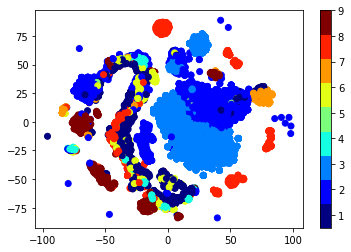

Time taken : 0:02:26.961629


In [63]:
#multivariate analysis on byte files
#this is with perplexity 50
from datetime import datetime
start = datetime.now()

xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(df.drop(['ID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()
print('Time taken :', datetime.now() - start)

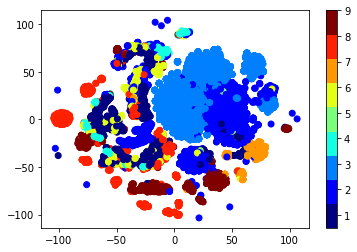

In [65]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(df.drop(['ID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# 8.0 Train Test split

In [68]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ID'],axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [69]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


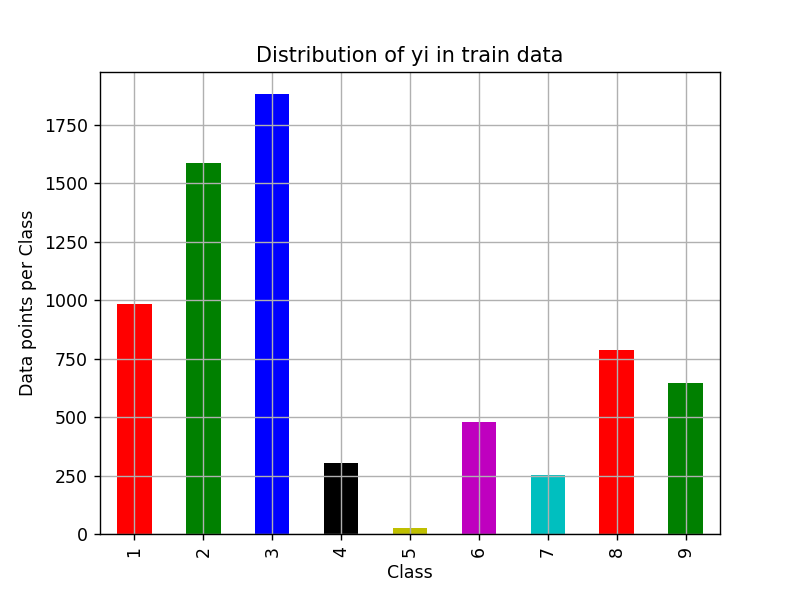

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


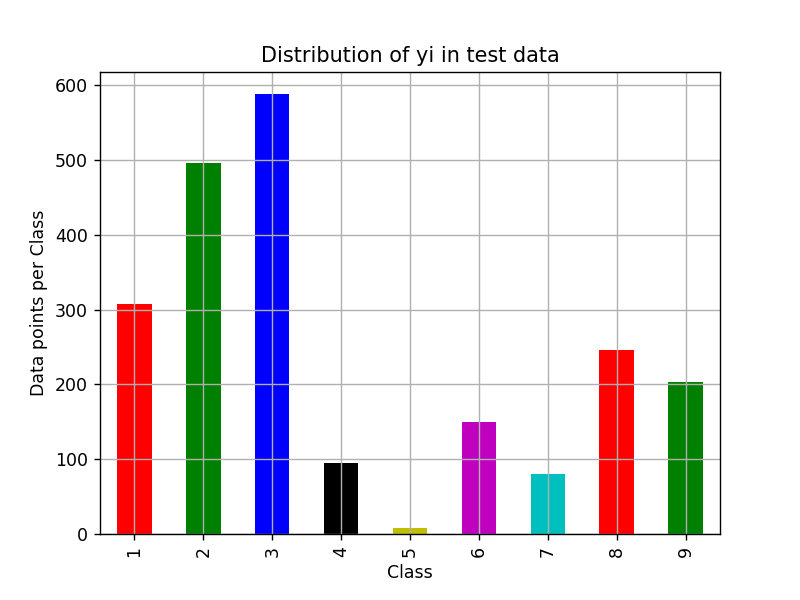

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


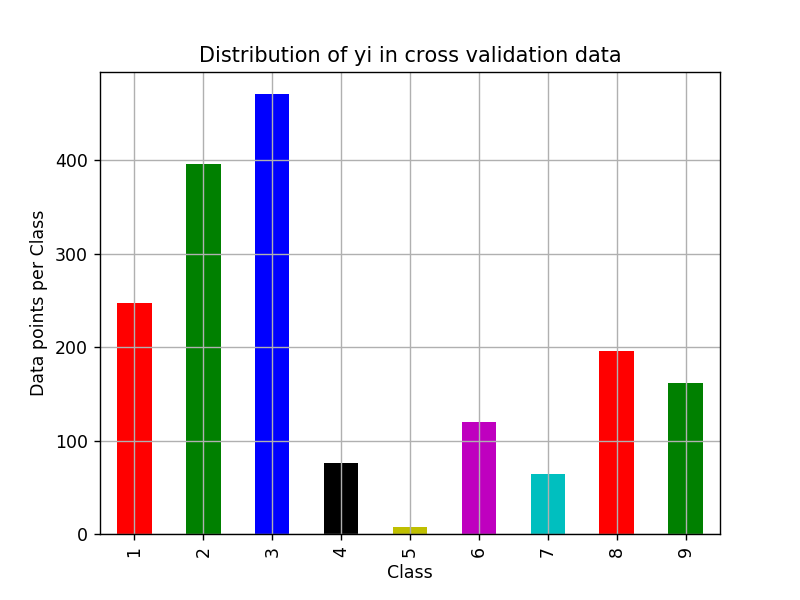

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [8]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>9. Machine Learning Models</h1>

<h2>9.1. Machine Leaning Models on bytes files</h2>

<h3>9.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.4531054433477606
Log loss on Test Data using Random Model 2.4990658142151583
Number of misclassified points  89.00643974241031
-------------------------------------------------- Confusion matrix --------------------------------------------------


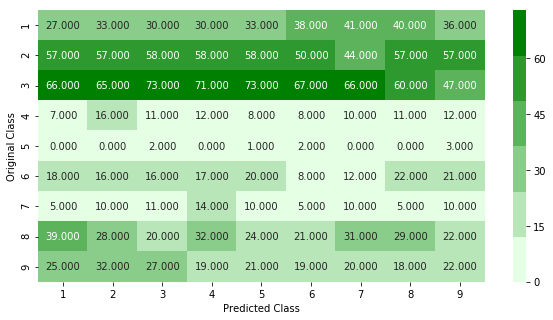

-------------------------------------------------- Precision matrix --------------------------------------------------


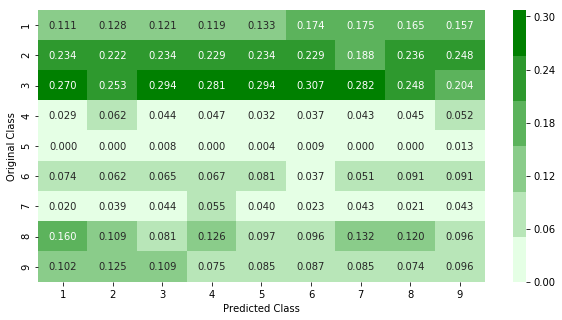

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


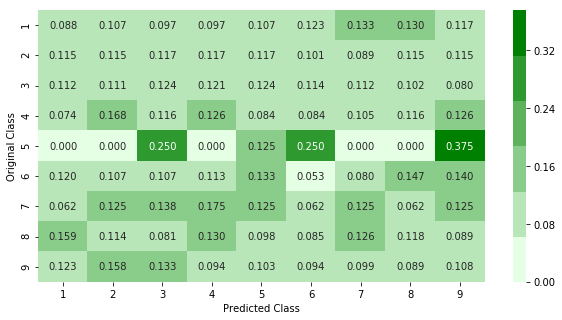

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>9.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.33352495720768904
log_loss for k =  3 is 0.3270566534949004
log_loss for k =  5 is 0.3488695634770476
log_loss for k =  7 is 0.3767450127133544
log_loss for k =  9 is 0.4033265733412528
log_loss for k =  11 is 0.42556433405334115
log_loss for k =  13 is 0.4412145407863747


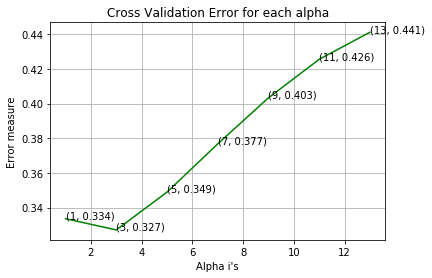

For values of best alpha =  3 The train log loss is: 0.1609580187839069
For values of best alpha =  3 The cross validation log loss is: 0.3270566534949004
For values of best alpha =  3 The test log loss is: 0.24658826597960276
Number of misclassified points  6.163753449862005
-------------------------------------------------- Confusion matrix --------------------------------------------------


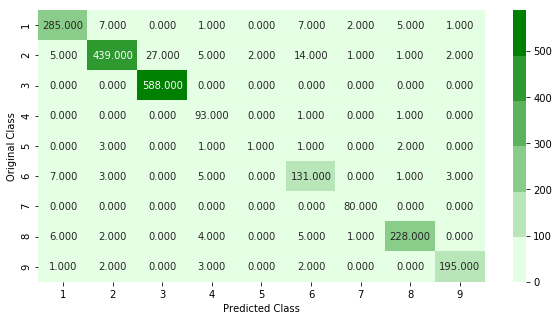

-------------------------------------------------- Precision matrix --------------------------------------------------


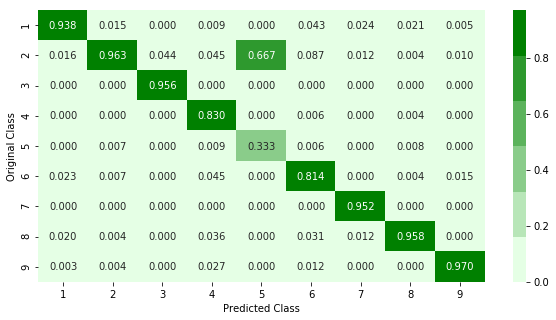

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


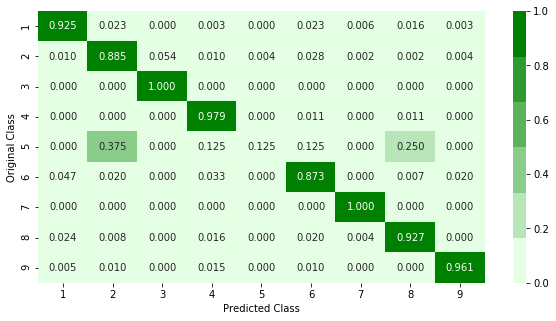

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [72]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>9.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.3711254763629888
log_loss for c =  0.0001 is 1.3708784368373415
log_loss for c =  0.001 is 1.3782240667102572
log_loss for c =  0.01 is 1.3738718254454478
log_loss for c =  0.1 is 1.3688613892342354
log_loss for c =  1 is 1.3668782481161537
log_loss for c =  10 is 1.3473170847016565
log_loss for c =  100 is 1.1706285958255276
log_loss for c =  1000 is 0.7421306872773538


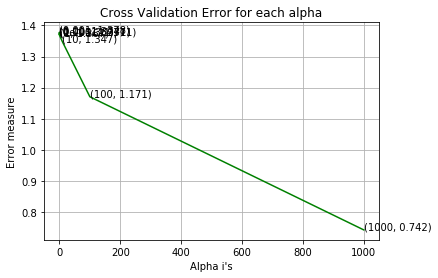

log loss for train data 0.7181800420845973
log loss for cv data 0.7421306872773538
log loss for test data 0.75427195423556
Number of misclassified points  18.629254829806808
-------------------------------------------------- Confusion matrix --------------------------------------------------


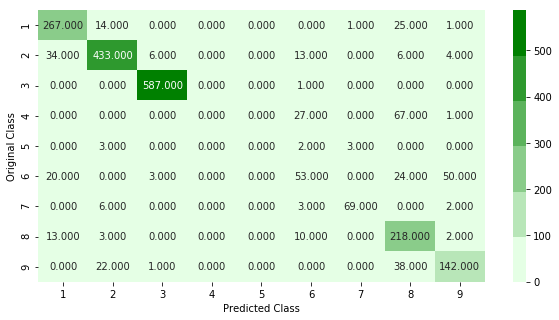

-------------------------------------------------- Precision matrix --------------------------------------------------


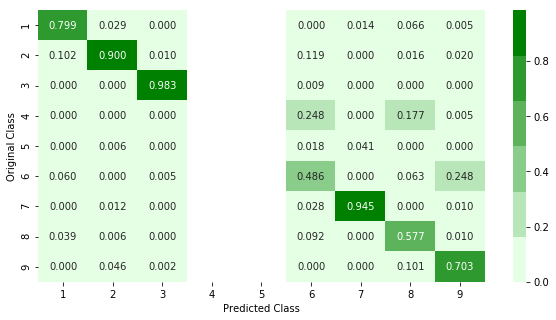

Sum of columns in precision matrix [ 1.  1.  1. nan nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


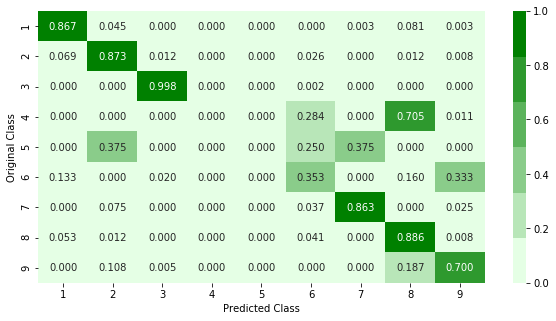

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [73]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 9.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.07551496241074587
log_loss for c =  50 is 0.06144771102143663
log_loss for c =  100 is 0.06227302610321789
log_loss for c =  500 is 0.06002876266456521
log_loss for c =  1000 is 0.059598708005681726
log_loss for c =  2000 is 0.05926072207908659
log_loss for c =  3000 is 0.0593320758885651


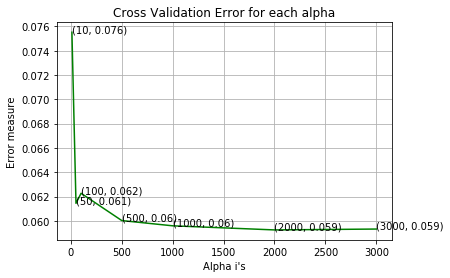

For values of best alpha =  2000 The train log loss is: 0.01538719607119837
For values of best alpha =  2000 The cross validation log loss is: 0.05926072207908659
For values of best alpha =  2000 The test log loss is: 0.040476834184450826
Number of misclassified points  0.7359705611775529
-------------------------------------------------- Confusion matrix --------------------------------------------------


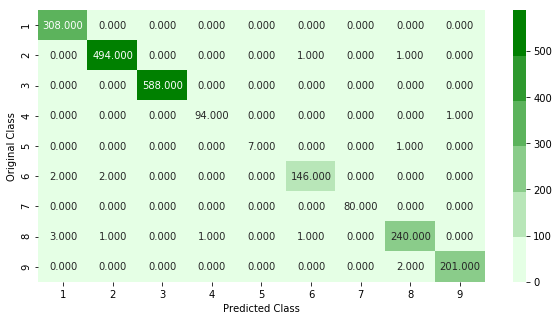

-------------------------------------------------- Precision matrix --------------------------------------------------


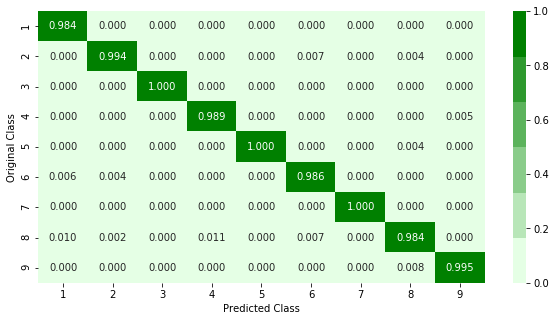

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


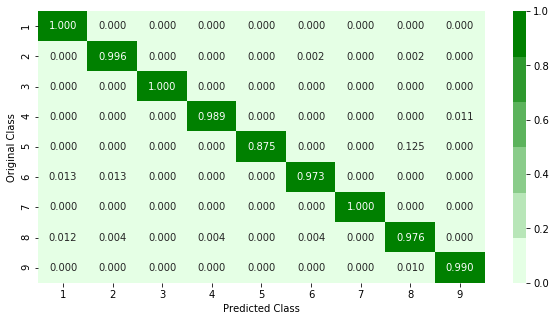

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [74]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>9.1.5. XgBoost Classification with hyperparameter tuning using RandomSearch</h3>

In [79]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train.values,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 12.1min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 12.8min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 15.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [80]:
random_cfl1.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 2000,
 'subsample': 1}

Train loss 0.013654539025214511
CV loss 0.04920656274178058
Test loss 0.036431419582942534
Number of misclassified points  0.5979760809567618
-------------------------------------------------- Confusion matrix --------------------------------------------------


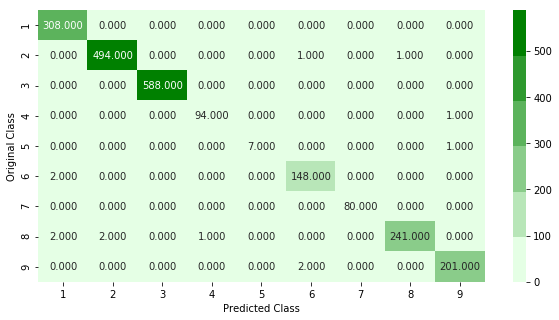

-------------------------------------------------- Precision matrix --------------------------------------------------


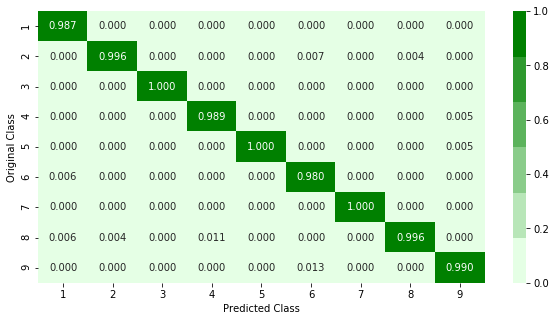

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


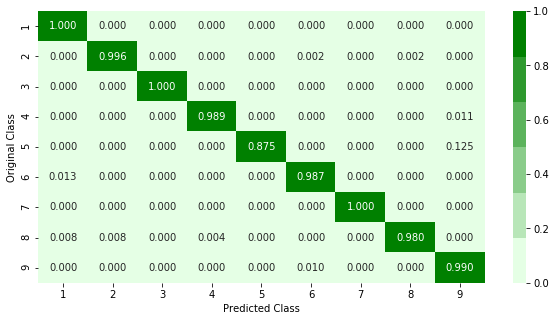

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [81]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.05, colsample_bytree=0.5, max_depth=5, subsample=1, nthread=-1)
x_cfl.fit(X_train.values,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('Train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('CV loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('Test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

<h1 style="text-align:center;font-size:40px;" > Modeling with .asm files </h1>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h1> 10.0 Feature extraction from asm files </h1>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [0]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [0]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...    edx  esi  eax  ebx  ecx  edi  ebp  esp  \
0      323        0       3  ...     18   66   15   43   83    0   17   48   
1        0        0       3  ...     18   29   48   82   12    0   14    0   
2      145        0       3  ...     13   42   10   67   14    0   11    0   
3        0        0       3  ...      6    8   14    7    2    0    8    0   
4        0        0       3  ...     12    9   18   29    5    0   11    0   

   eip  Class  
0   29      1  
1   20      1  
2    9      1  
3    6      1  
4   11      1  

[5 rows x 53 columns]

<h2> 10.1 Files sizes of each .asm file </h2>

In [0]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

   Class                    ID       size
0      9  01azqd4InC7m9JpocGv5  56.229886
1      2  01IsoiSMh5gxyDYTl4CB  13.999378
2      9  01jsnpXSAlgw6aPeDxrU   8.507785
3      1  01kcPWA9K2BOxQeS5Rju   0.078190
4      8  01SuzwMJEIXsK7A8dQbl   0.996723


<h3> 10.1.1 Distribution of .asm file sizes</h3>

<IPython.core.display.Javascript object>


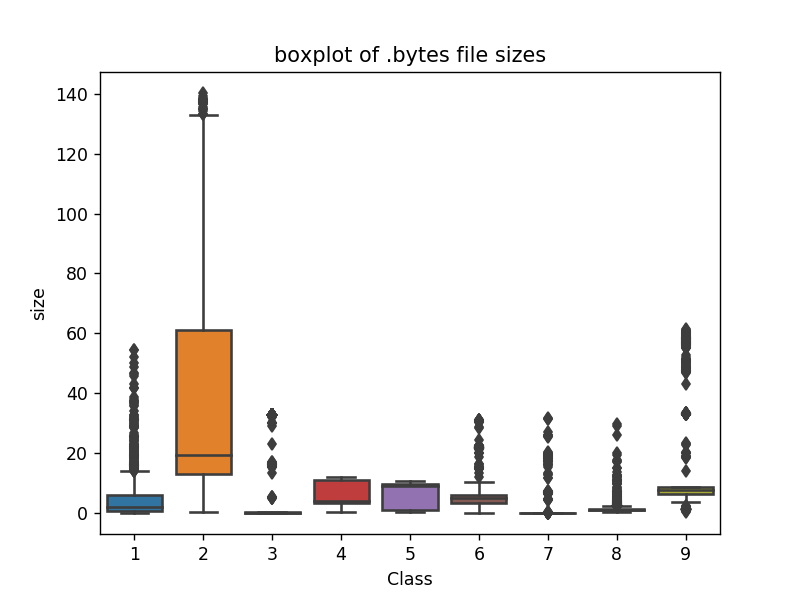

In [0]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [0]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:    ...     esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3    ...      66   15   43   83    0   17   48   29   
1        0        0       3    ...      29   48   82   12    0   14    0   20   
2      145        0       3    ...      42   10   67   14    0   11    0    9   
3        0        0       3    ...       8   14    7    2    0    8    0    6   
4        0        0       3    ...       9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [0]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:    ...          esi       eax       ebx  \
0  0.000084      0.0  0.000072    ...     0.000746  0.000301  0.000360   
1  0.000000      0.0  0.000072    ...     0.000328  0.000965  0.000686   
2  0.000038      0.0  0.000072    ...     0.000475  0.000201  0.000560   
3  0.000000      0.0  0.000072    ...     0.000090  0.000281  0.000059   
4  0.000000      0.0  0.000072    ...     0.000102  0.000362  0.000243   

        ecx  edi       ebp       esp       eip  Class      size  
0  0.001057  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.000153  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.000178  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.000025  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.000064  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h2> 10.2 Univariate analysis on  asm file features</h2>

<IPython.core.display.Javascript object>


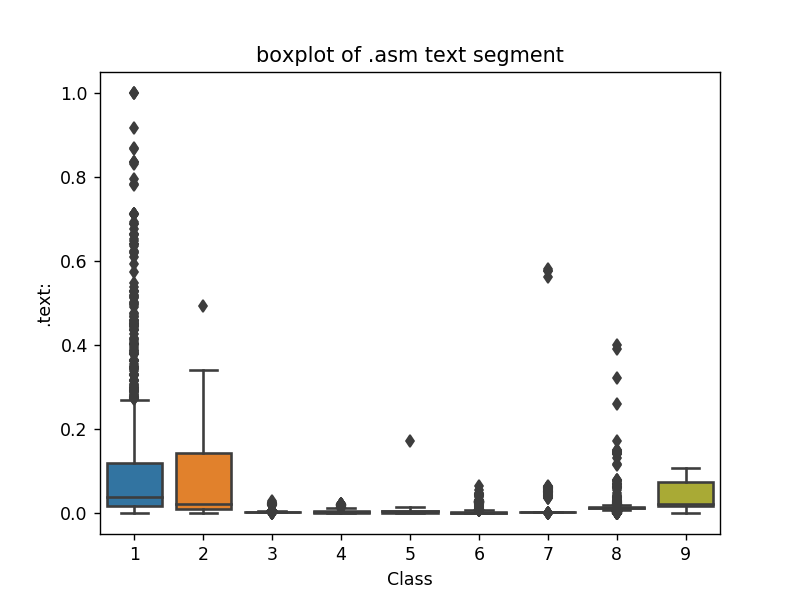

In [0]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


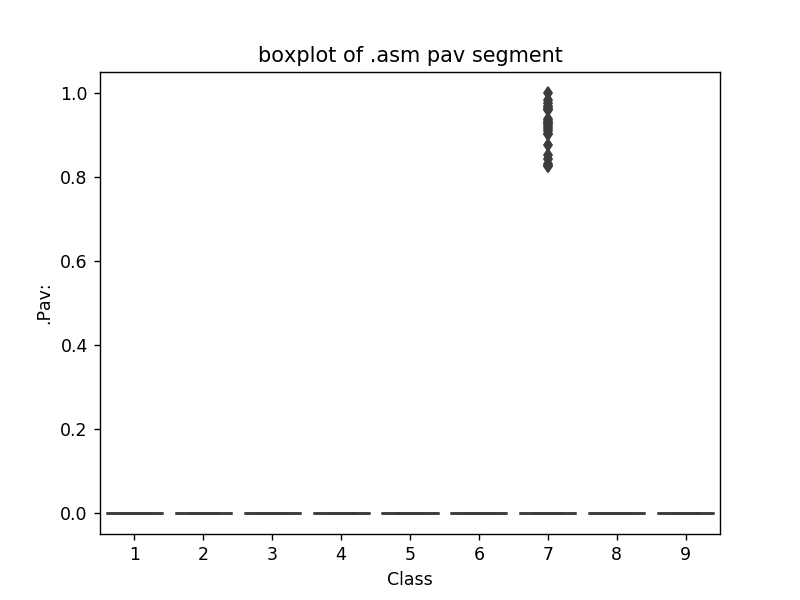

In [0]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


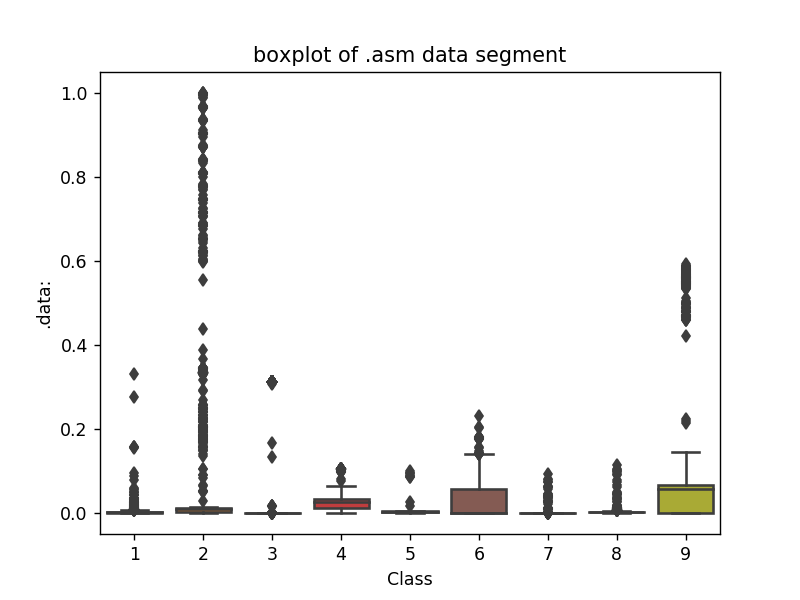

In [0]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


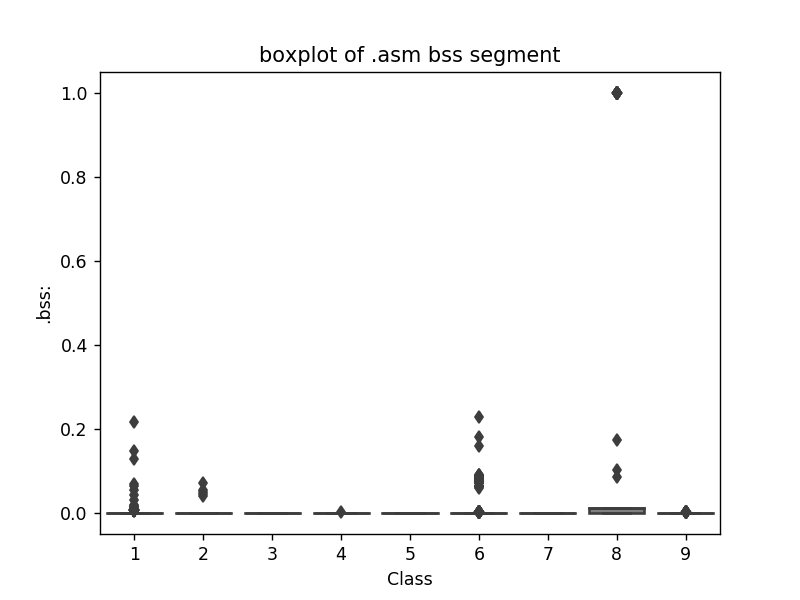

In [0]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


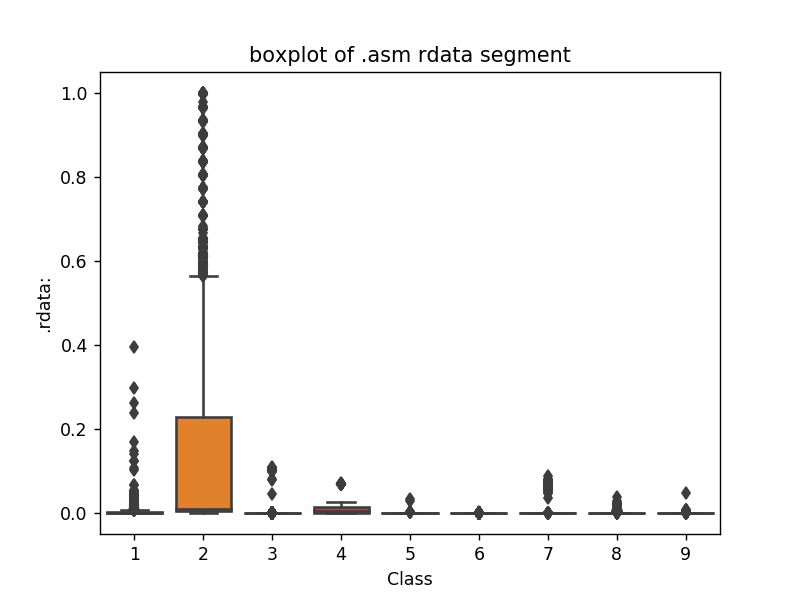

In [0]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


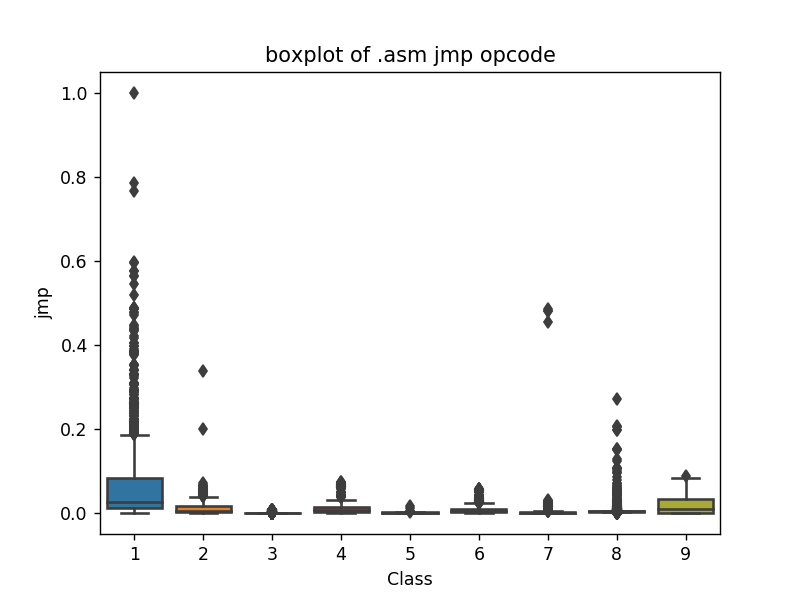

In [0]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


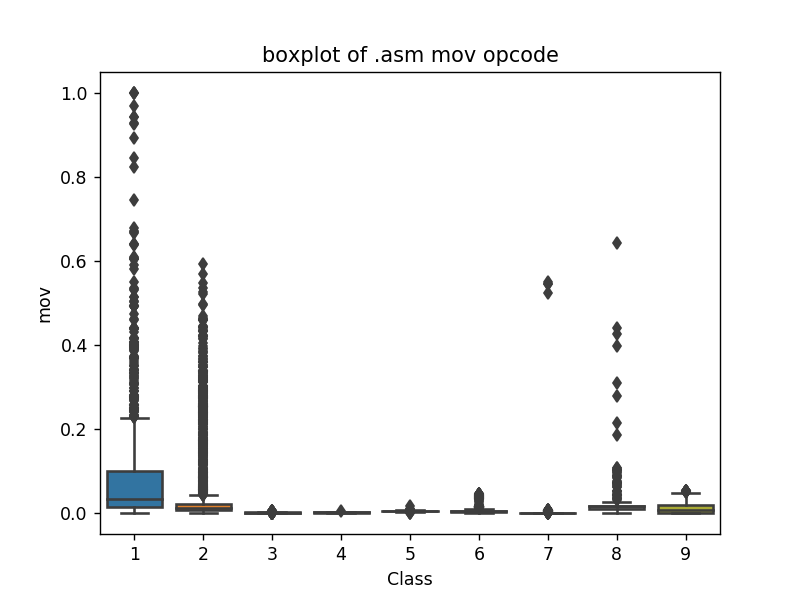

In [0]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


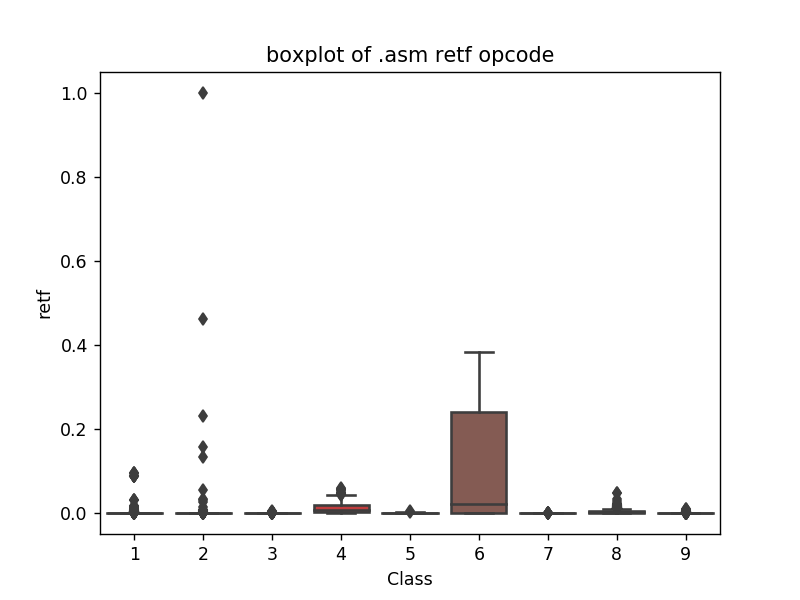

In [0]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


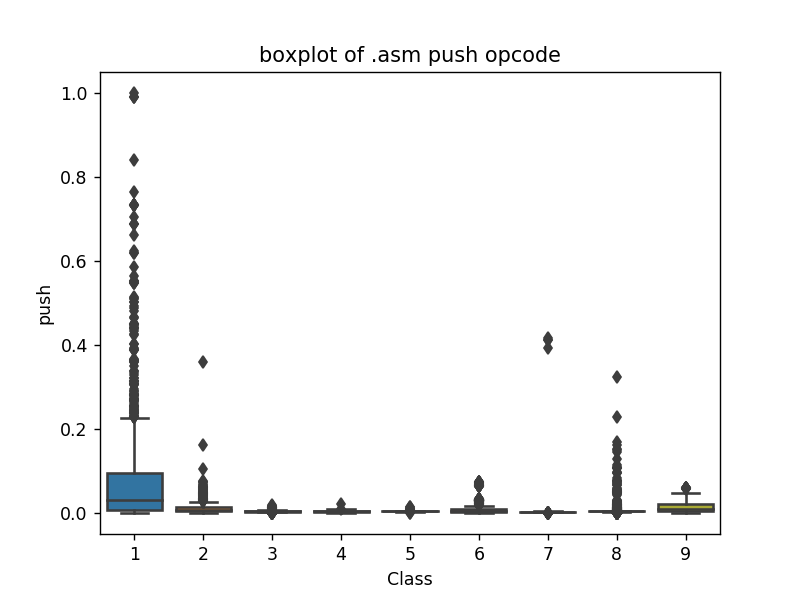

In [0]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h2> 10.3 Multivariate Analysis on .asm file features </h2>

<IPython.core.display.Javascript object>


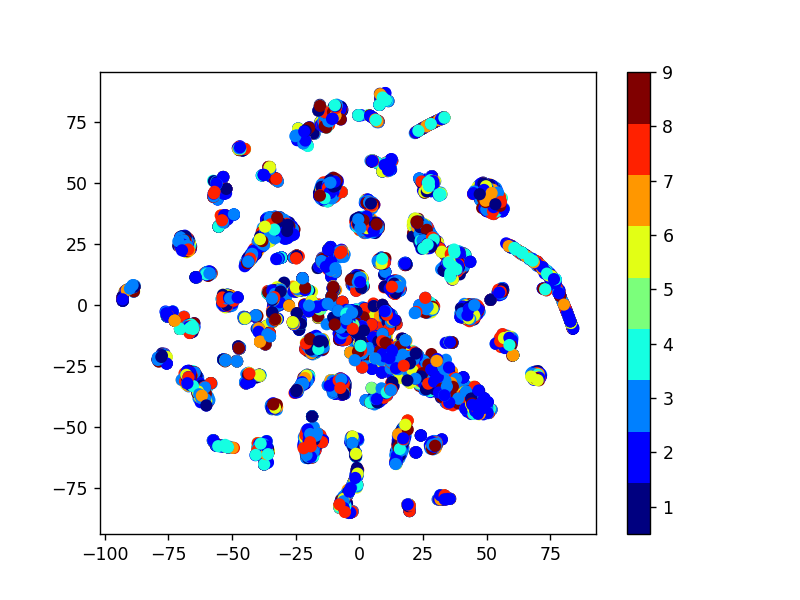

In [0]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


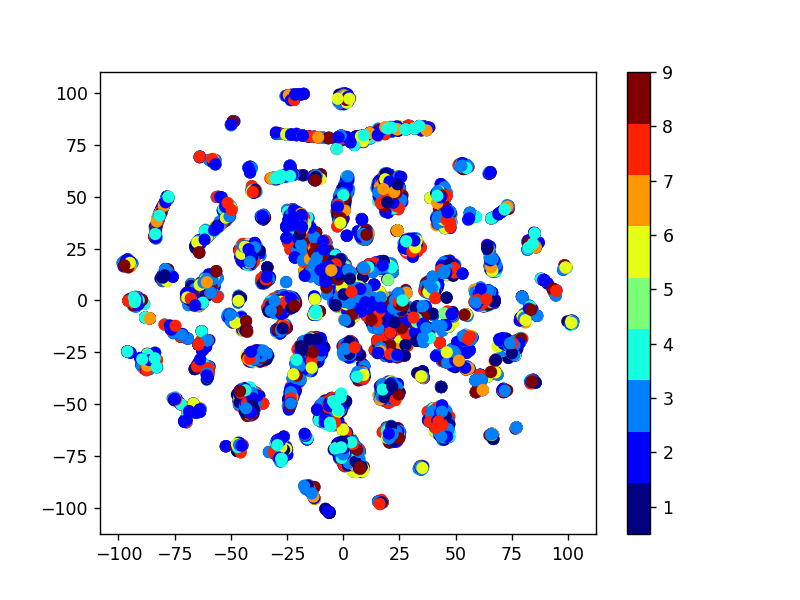

In [0]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 10.4 Train and test split</h2>

In [0]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [0]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [0]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 10.5 Machine Learning models on features of .asm files</h2>

<h3> 10.5.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


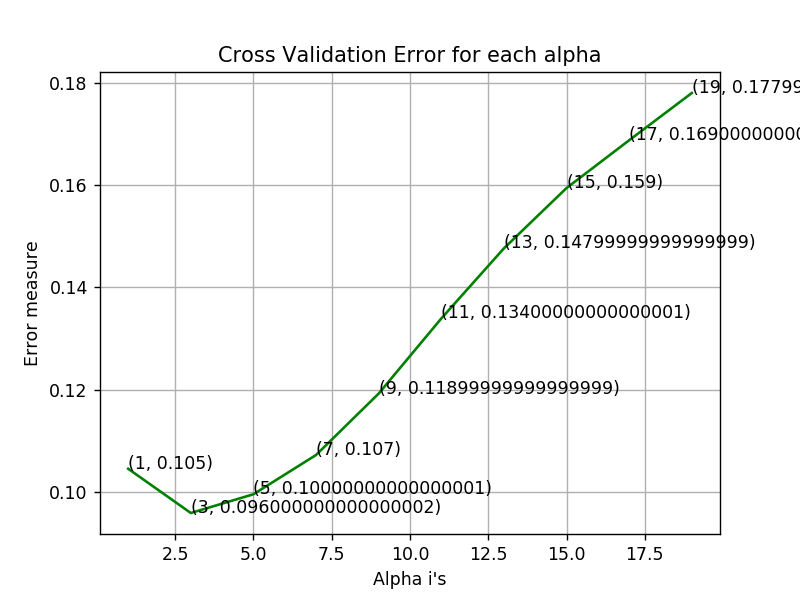

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


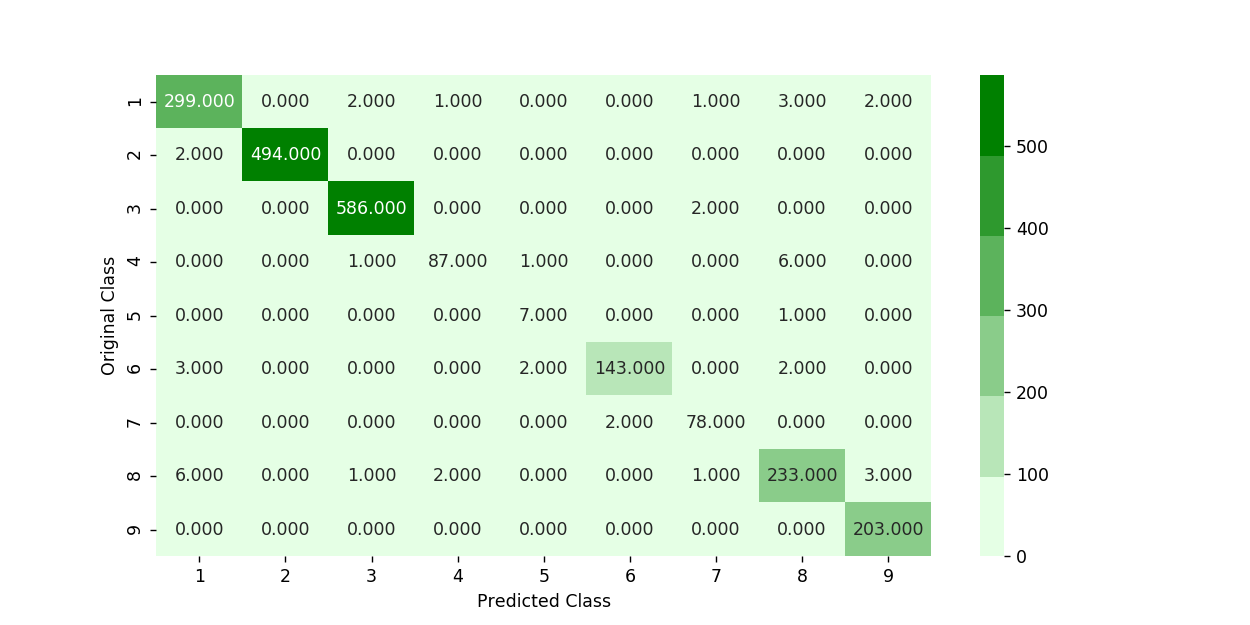

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


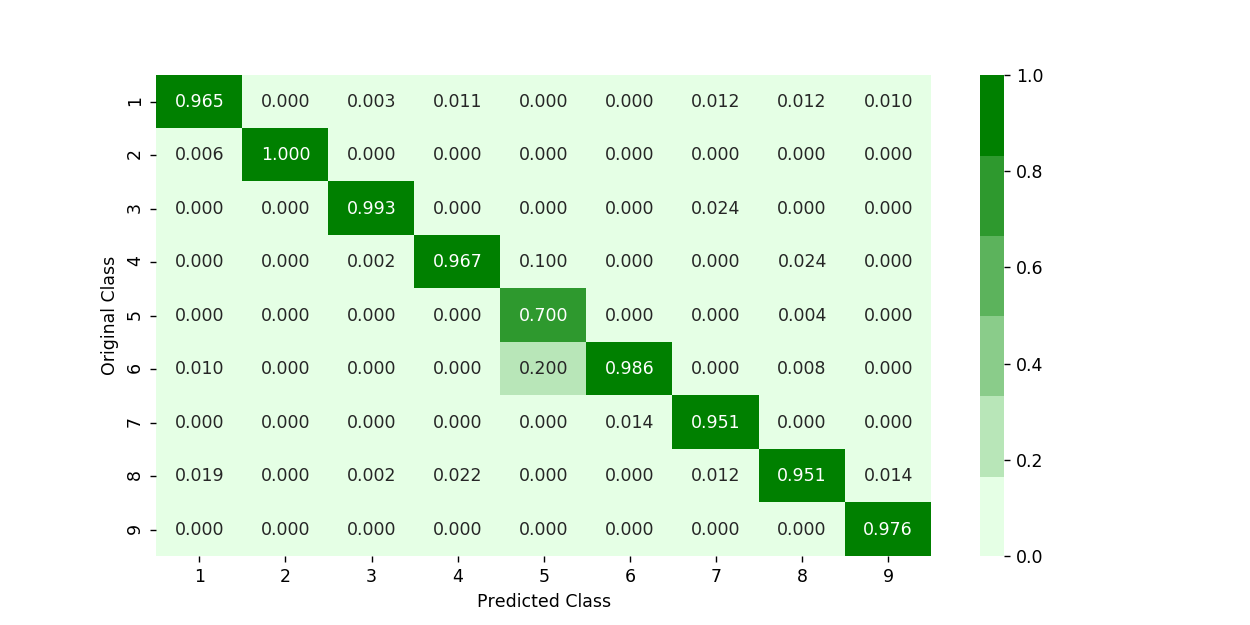

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


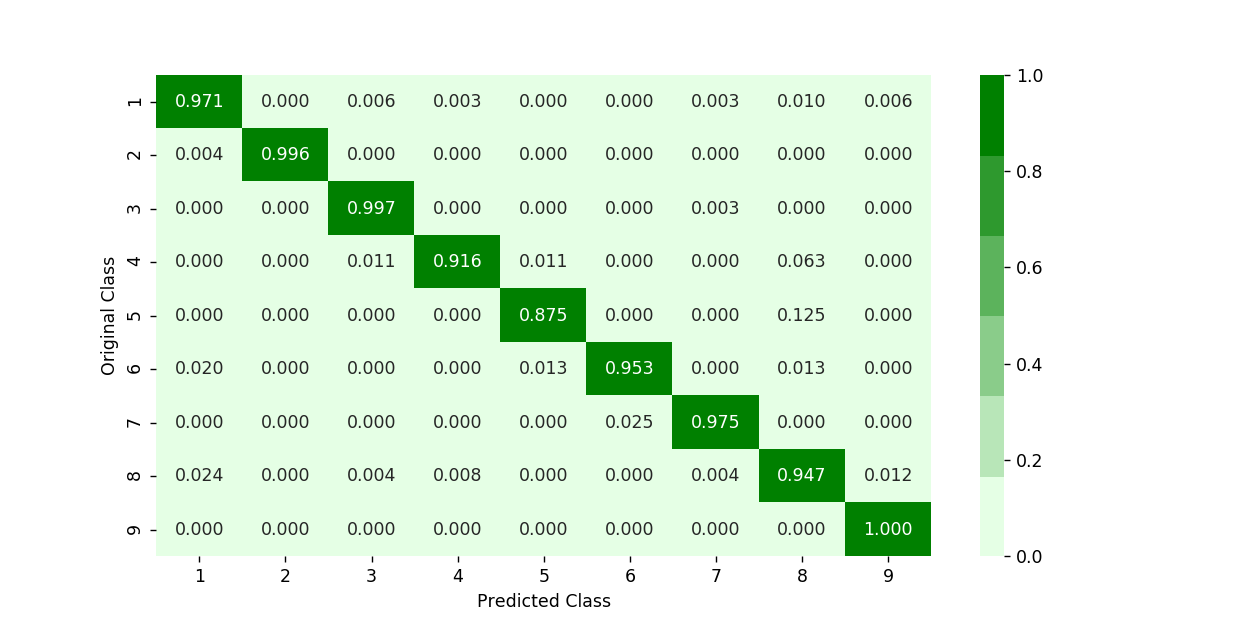

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 10.5.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


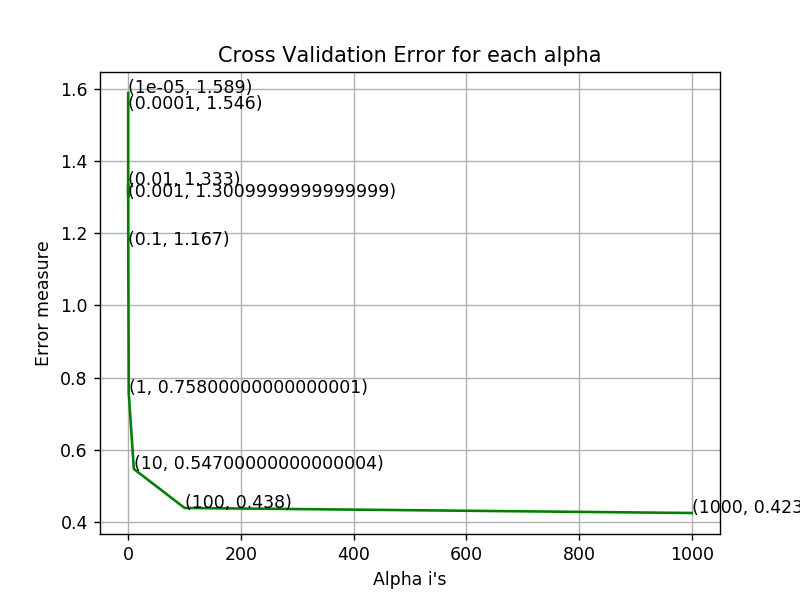

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


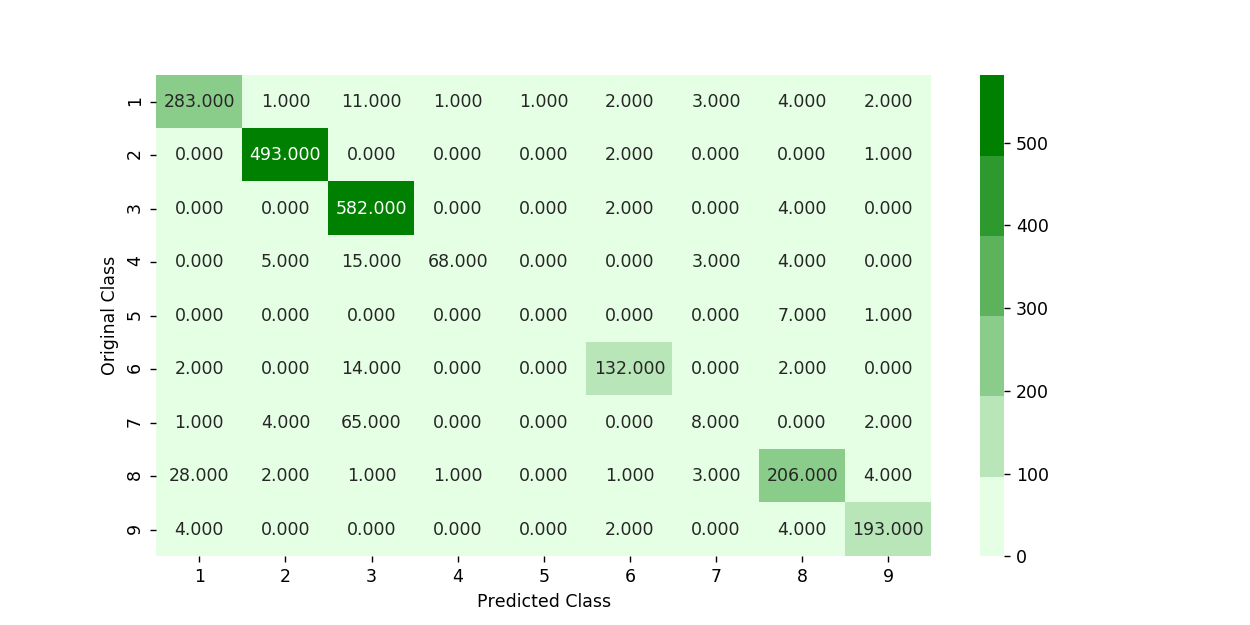

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


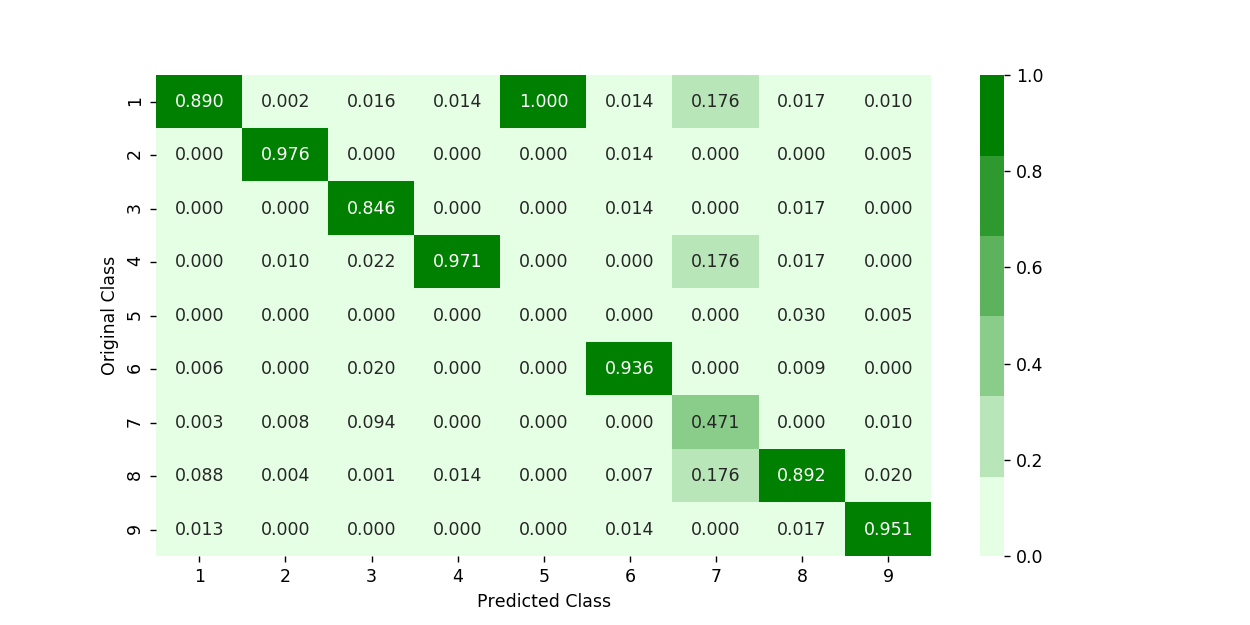

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


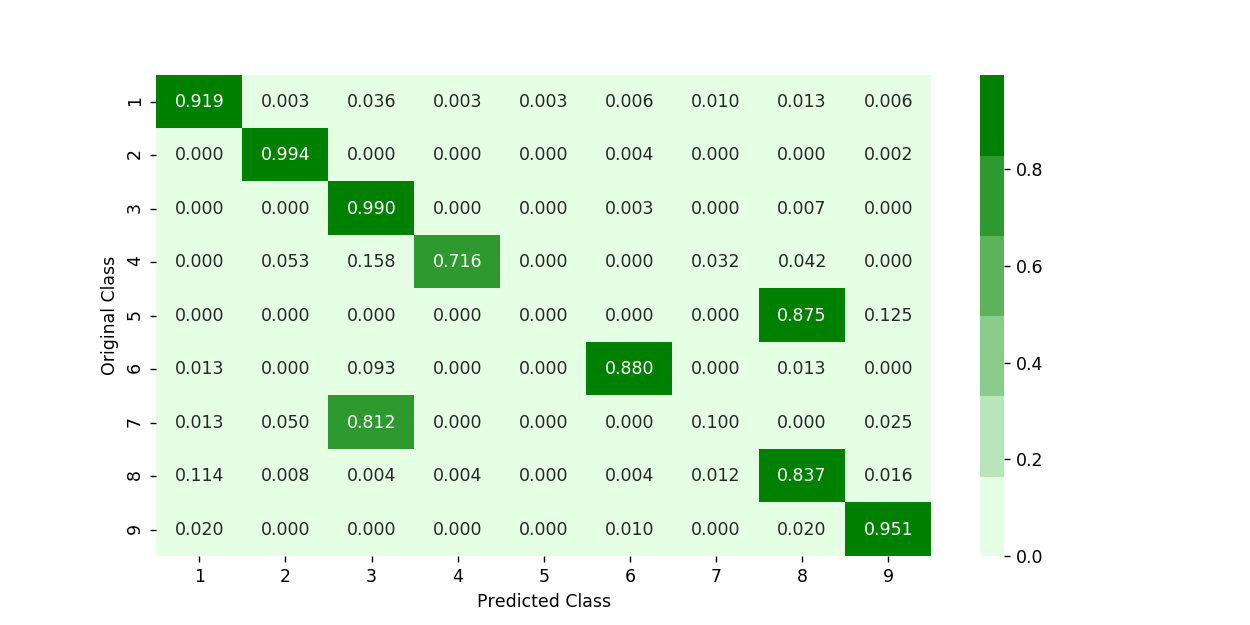

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 10.5.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


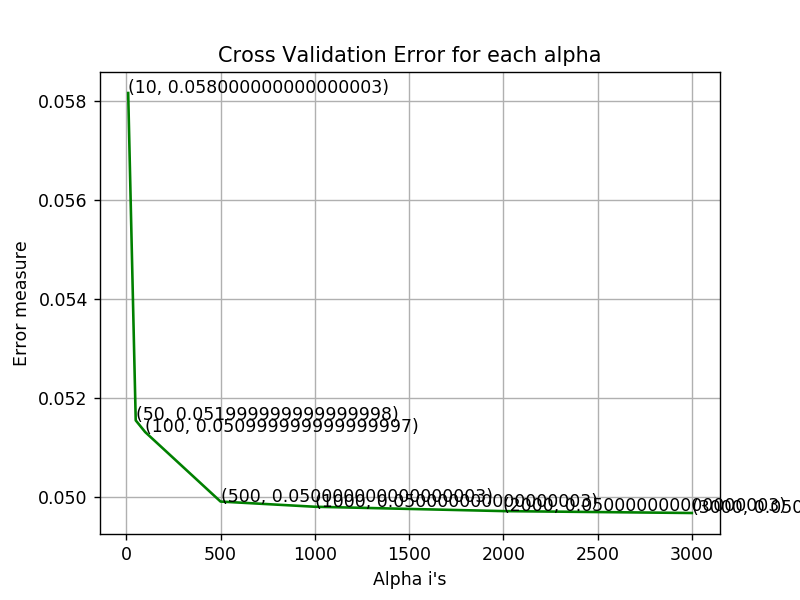

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


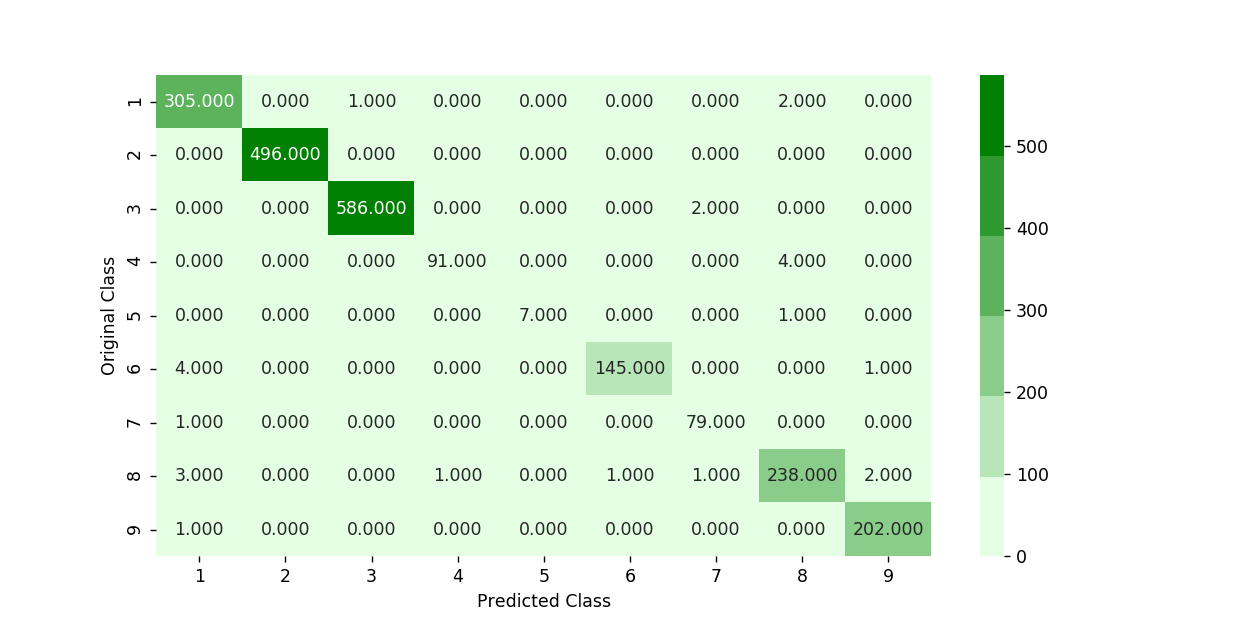

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


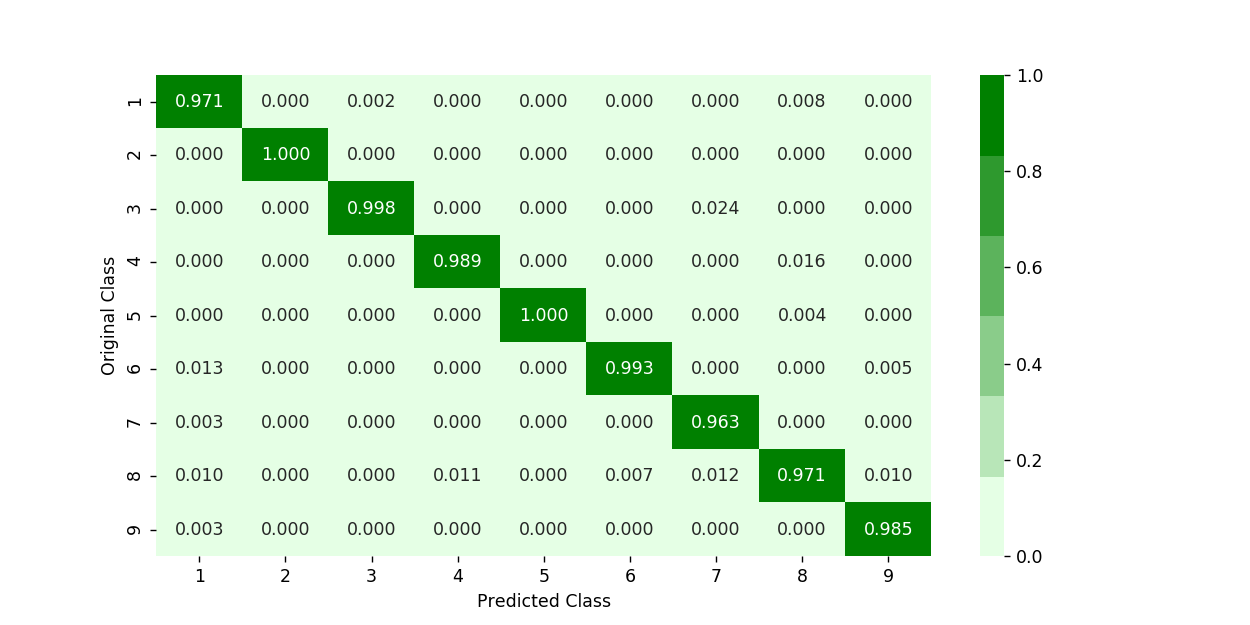

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


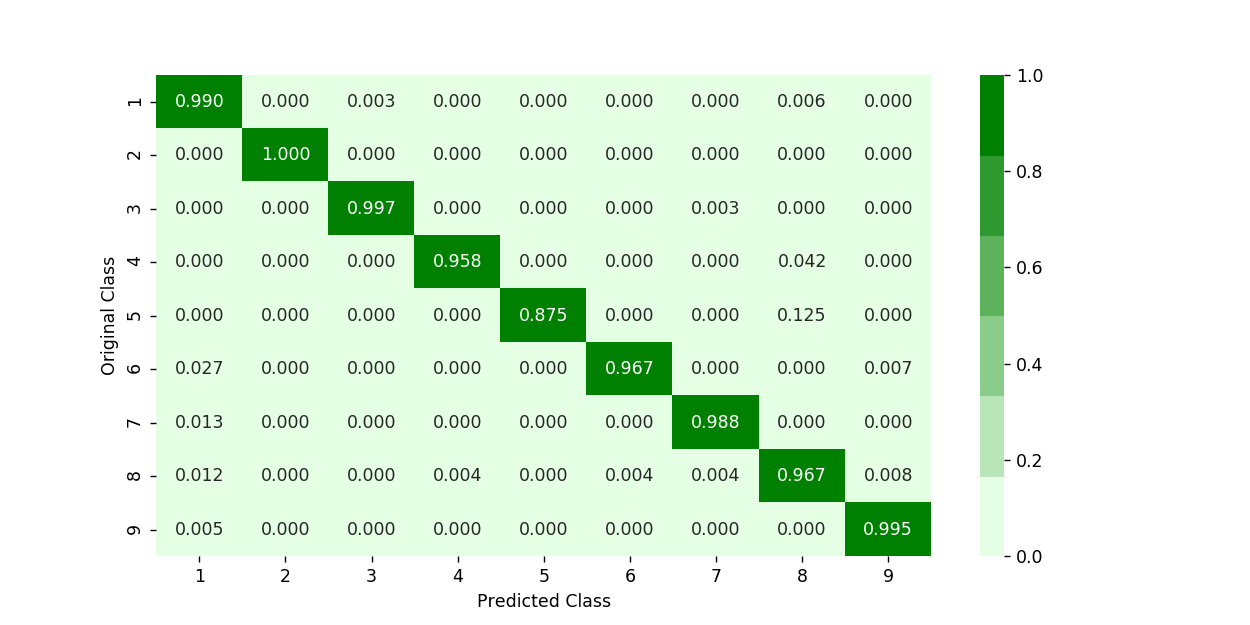

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 10.5.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


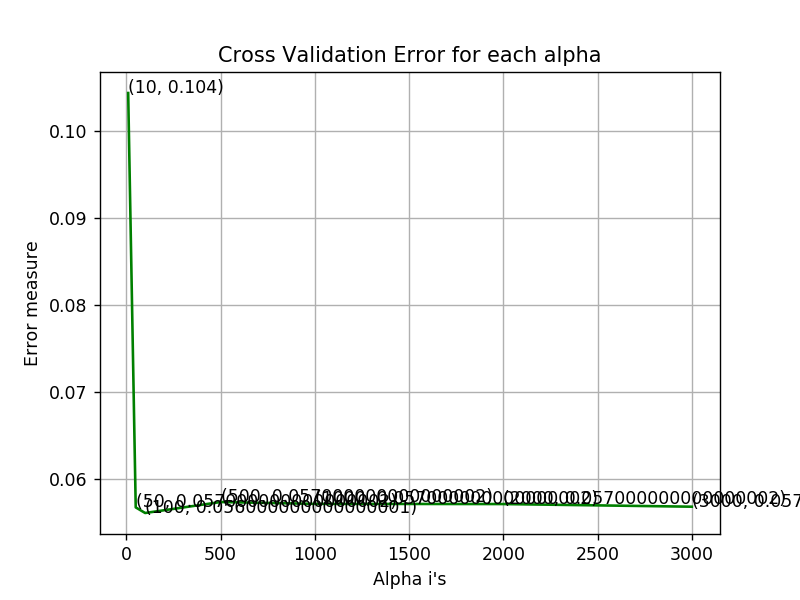

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


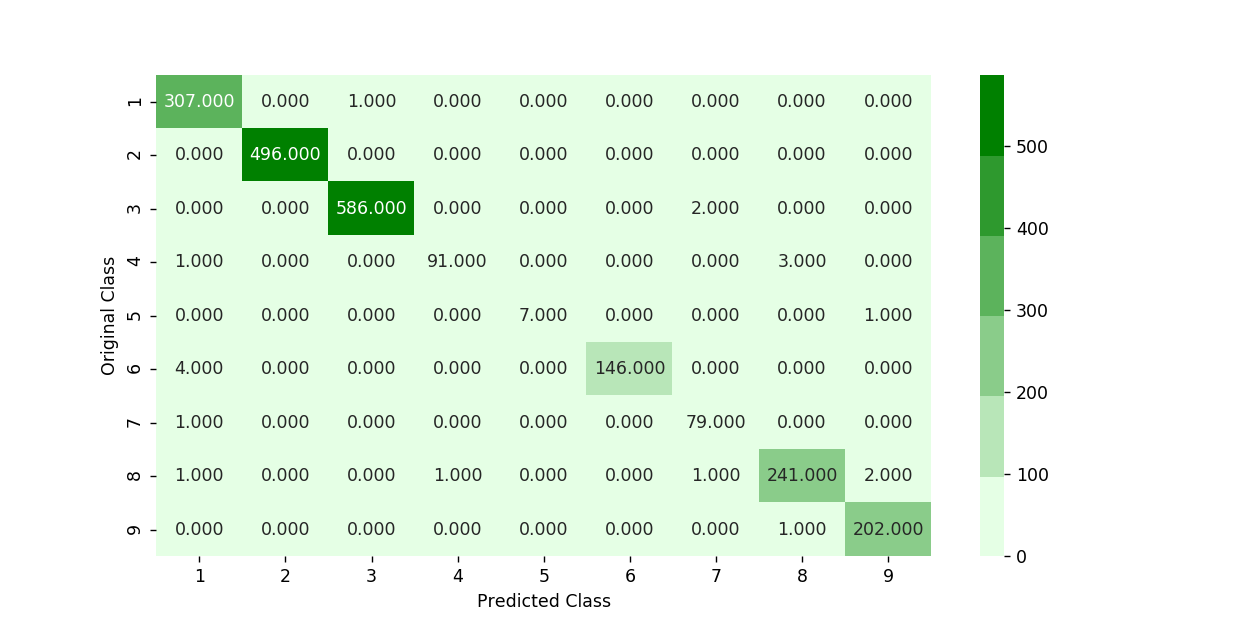

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


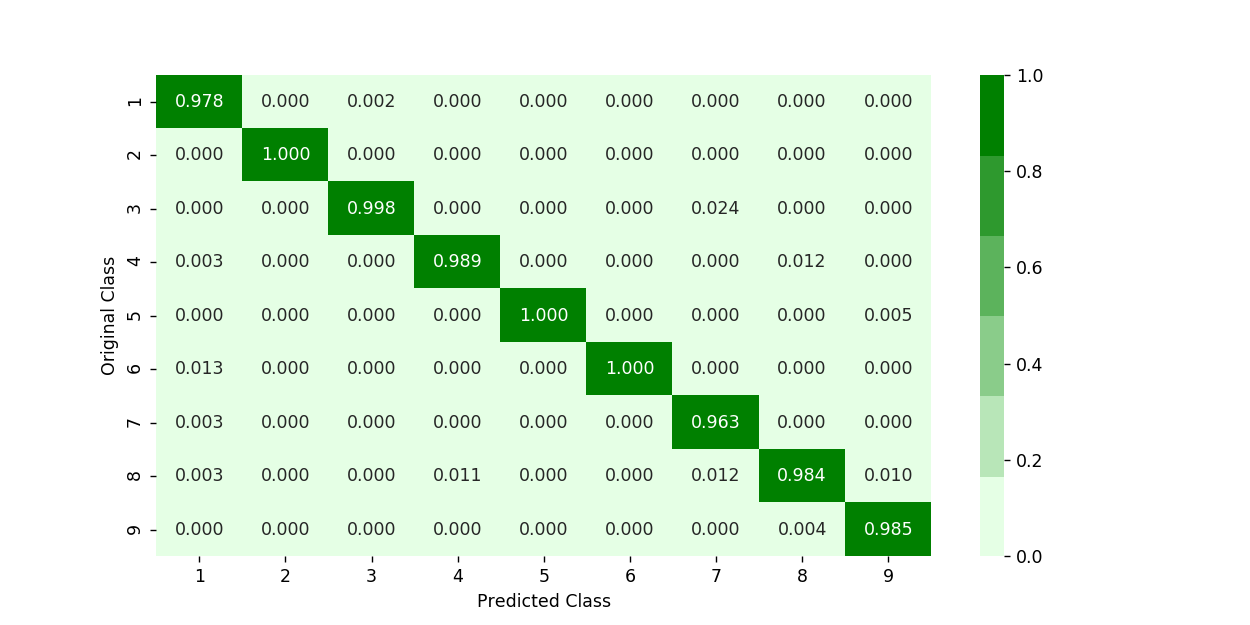

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


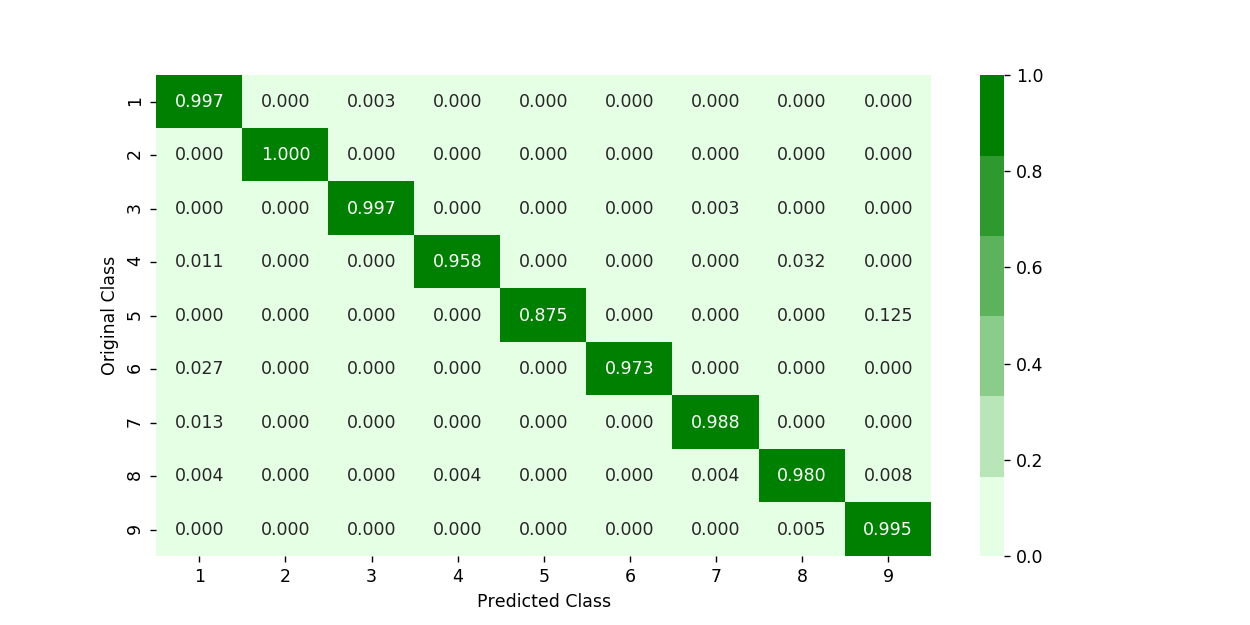

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 10.5.5 Xgboost Classifier with best hyperparameters</h3>

In [0]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [0]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


<h1 style="text-align:center;font-size:35px;" >11.0 Machine Learning models on features of both .asm and .bytes files</h1>

<h2> 11.1. Merging both asm and byte file features</h3>

In [51]:
result.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...     ff 15     6f 00     00 ba     f9 24  \
0  0.000015  0.000002  0.003440  ...  0.000035  0.000002  0.000005  0.000039   
1  0.000043  0.000221  0.000006  ...  0.000081  0.006148  0.000024  0.000000   
2  0.000094  0.000103  0.000012  ...  0.000097  0.000056  0.000076  0.000000   
3  0.000169  0.000024  0.000057  ...  0.000011  0.000012  0.000017  0.000207   
4  0.000020  0.000000  0.000555  ...  0.000137  0.000095  0.000037  0.000013   

      10 85     d2 00        07     ff 01                    ID      size  
0  0.000002  0.000003  0.000016  0.000012  gyZztfseanvGp5uX2qix  0.008629  
1  0.000005  0.000001  0.000166  0.000067  HSpxv7XiuwNj2ceELTnJ  0.137475  
2  0.000194  0.000125  0.000061  0.000390  64FZCyUcjXxLNv1K8Bm3  0.077644  
3  0.000015  0.000020  0.000076  0.000019  H7k4tXfrKFIZN1GqnYUw  0.150254  
4  0.000013  0.000093  0.000017  0.000021  AjhW6ifgDC38ObQcJPa5  0.011557  

[5 rows x 502 columns]

In [8]:
result_asm= pd.read_csv('asmoutputfile.csv')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  :dword  edx  esi  eax  ebx  ecx  edi  ebp  \
0      323        0       3  ...     137   18   66   15   43   83    0   17   
1        0        0       3  ...     130   18   29   48   82   12    0   14   
2      145        0       3  ...      84   13   42   10   67   14    0   11   
3        0        0       3  ...      25    6    8   14    7    2    0    8   
4        0        0       3  ...      18   12    9   18   29    5    0   11   

   esp  eip  
0   48   29  
1    0   20  
2    0    9  
3    0    6  
4    0   11  

[5 rows x 52 columns]

In [9]:
print(result.shape)
print(result_asm.shape)

(10868, 502)
(10868, 52)


In [10]:
## Normalizing result_asm
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [11]:
asm_norm = normalize(result_asm)

In [12]:
asm_norm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...    :dword       edx       esi       eax  \
0  0.000084      0.0  0.000072  ...  0.001028  0.000343  0.000746  0.000301   
1  0.000000      0.0  0.000072  ...  0.000975  0.000343  0.000328  0.000965   
2  0.000038      0.0  0.000072  ...  0.000630  0.000248  0.000475  0.000201   
3  0.000000      0.0  0.000072  ...  0.000188  0.000114  0.000090  0.000281   
4  0.000000      0.0  0.000072  ...  0.000135  0.000229  0.000102  0.000362   

        ebx       ecx  edi       ebp       esp       eip  
0  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
1  0.000686  0.000153  0.0  0.025362  0.000000  0.002188  
2  0.000560  0.000178  0.0  0.019928  0.000000  0.000985  
3  0.000059  0.000025  0.0  0.014493  0.000000  0.000657  
4  0.000243  0.000064  0.0  0.019928  0.000000  0.001204  

[5 rows x 52 columns]

In [92]:
asm_norm.to_csv('asmfeat_norm.csv')

In [53]:
asm_norm= pd.read_csv('asmfeat_norm.csv', index_col=0)
asm_norm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...    :dword       edx       esi       eax  \
0  0.000084      0.0  0.000072  ...  0.001028  0.000343  0.000746  0.000301   
1  0.000000      0.0  0.000072  ...  0.000975  0.000343  0.000328  0.000965   
2  0.000038      0.0  0.000072  ...  0.000630  0.000248  0.000475  0.000201   
3  0.000000      0.0  0.000072  ...  0.000188  0.000114  0.000090  0.000281   
4  0.000000      0.0  0.000072  ...  0.000135  0.000229  0.000102  0.000362   

        ebx       ecx  edi       ebp       esp       eip  
0  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
1  0.000686  0.000153  0.0  0.025362  0.000000  0.002188  
2  0.000560  0.000178  0.0  0.019928  0.000000  0.000985  
3  0.000059  0.000025  0.0  0.014493  0.000000  0.000657  
4  0.000243  0.000064  0.0  0.019928  0.000000  0.001204  

[5 rows x 52 columns]

In [54]:
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [55]:
result_x = pd.merge(result, asm_norm, on='ID', how='left')
result_y = data_y
result_x.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...    :dword       edx       esi       eax  \
0  0.000015  0.000002  0.003440  ...  0.002550  0.002442  0.002068  0.002592   
1  0.000043  0.000221  0.000006  ...  0.009338  0.005362  0.010022  0.009385   
2  0.000094  0.000103  0.000012  ...  0.028689  0.014082  0.020146  0.021865   
3  0.000169  0.000024  0.000057  ...  0.002445  0.001336  0.001717  0.004220   
4  0.000020  0.000000  0.000555  ...  0.046795  0.033870  0.036745  0.042364   

        ebx       ecx  edi       ebp       esp       eip  
0  0.000887  0.003809  0.0  0.041667  0.000000  0.005580  
1  0.007210  0.006255  0.0  0.054348  0.000520  0.024839  
2  0.014220  0.009911  0.0  0.005435  0.000948  0.008973  
3  0.001539  0.002854  0.0  0.021739  0.000000  0.004267  
4  0.029687  0.018841  0.0  0.045290  0.000000  0.023744  

[5 rows x 553 columns]

In [56]:
# removing columns having NaN values
result_x = result_x.drop(['rtn','.BSS:','.CODE'], axis=1)

In [57]:
result_x.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...    :dword       edx       esi       eax  \
0  0.000015  0.000002  0.003440  ...  0.002550  0.002442  0.002068  0.002592   
1  0.000043  0.000221  0.000006  ...  0.009338  0.005362  0.010022  0.009385   
2  0.000094  0.000103  0.000012  ...  0.028689  0.014082  0.020146  0.021865   
3  0.000169  0.000024  0.000057  ...  0.002445  0.001336  0.001717  0.004220   
4  0.000020  0.000000  0.000555  ...  0.046795  0.033870  0.036745  0.042364   

        ebx       ecx  edi       ebp       esp       eip  
0  0.000887  0.003809  0.0  0.041667  0.000000  0.005580  
1  0.007210  0.006255  0.0  0.054348  0.000520  0.024839  
2  0.014220  0.009911  0.0  0.005435  0.000948  0.008973  
3  0.001539  0.002854  0.0  0.021739  0.000000  0.004267  
4  0.029687  0.018841  0.0  0.045290  0.000000  0.023744  

[5 rows x 550 columns]

In [58]:
result_x.to_csv('byte_asm_feat.csv')

<h2> 11.2. Multivariate Analysis on final fearures</h3>

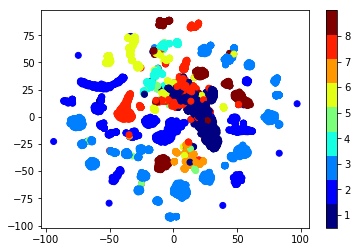

Time taken : 0:02:45.359950


In [103]:
from datetime import datetime
start = datetime.now()

xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x.drop(['ID'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()
print('Time taken :', datetime.now() - start)

<h2> 11.3. Train and Test split</h3>

In [19]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x.drop(['ID'],axis=1), result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [20]:
print(X_train_merge.shape)
print(X_cv_merge.shape)
print(X_test_merge.shape)

(6955, 549)
(1739, 549)
(2174, 549)


<h2> 11.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.041474153828892406
log_loss for c =  50 is 0.03058536619256063
log_loss for c =  100 is 0.029632675962602703
log_loss for c =  500 is 0.02849241052674486
log_loss for c =  1000 is 0.028552565888013776
log_loss for c =  2000 is 0.02874101655679386
log_loss for c =  3000 is 0.028610734203571905


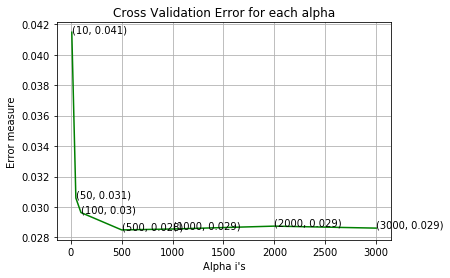

For values of best alpha =  500 The train log loss is: 0.011518881083246389
For values of best alpha =  500 The cross validation log loss is: 0.02849241052674486
For values of best alpha =  500 The test log loss is: 0.03385965310850077


In [107]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h2> 11.5 XgBoost Classifier on final features with hyperparameter tuning using Random search</h3>

In [21]:
from datetime import datetime
start = datetime.now()

x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge.values, y_train_merge)

print('Time taken :', datetime.now() - start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  8.5min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  9.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 10.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.6min finished


Time taken : 0:33:03.920486


In [22]:
random_cfl.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.15,
 'max_depth': 3,
 'n_estimators': 2000,
 'subsample': 0.5}

In [25]:
x_cfl=XGBClassifier(n_estimators=2000,max_depth=3,learning_rate=0.15,colsample_bytree=1,subsample=0.5,nthread=-1)
x_cfl.fit(X_train_merge.values,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ("The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print("The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print("The test log loss is:",log_loss(y_test_merge, predict_y))

The train log loss is: 0.011203911217442032
The cross validation log loss is: 0.031714834293870314
The test log loss is: 0.01844743693235514


NameError: name 'y_test_asm' is not defined

## Please ignore the above Name error

<h1 style="text-align:center;font-size:35px;" > 12.0 ASM Image Extraction </h1>

Ref: https://github.com/dchad/malware-detection/blob/master/mmcc/feature-extraction.ipynb

## 12.1 Utility functions

In [23]:
# From Say_No_to_Overfitting
def entropy(p,n):
    p_ratio = float(p)/(p+n)
    n_ratio = float(n)/(p+n)
    return -p_ratio*math.log(p_ratio) - n_ratio * math.log(n_ratio)

def info_gain(p0,n0,p1,n1,p,n):
    return entropy(p,n) - float(p0+n0)/(p+n)*entropy(p0,n0) - float(p1+n1)/(p+n)*entropy(p1,n1)

In [24]:
def read_image(filename):
    f = open(filename,'rb')
    ln = os.path.getsize(filename) # length of file in bytes
    width = 256
    rem = ln%width
    a = array.array("B") # uint8 array
    a.fromfile(f,ln-rem)
    f.close()
#     print(type(a), int(len(a)/width))
    g = np.reshape(a,(int(len(a)/width), width))
#     print("#####")
    g = np.uint8(g)
    g = np.resize(g, (1000,))
    return list(g)

In [26]:
# Do asm image extraction
def extract_asm_image_features(tfiles):
    asm_files = [i for i in tfiles if '.asm' in i]
    ftot = len(asm_files)
    
    pid = os.getpid()
#     print('Process id:', pid)
    feature_file = os.path.join(dir_path, str(pid) + '-image-features-asm.csv')
#     print('feature file:', feature_file)
    
    outrows = []
    with open(feature_file,'w') as f:
        fw = writer(f)
        column_names = ['filename'] + [("ASM_{:s}".format(str(x))) for x in range(1000)]
        fw.writerow(column_names)
        for idx, fname in enumerate(asm_files):
            file_id = fname.split('.')[0]
#             print("reading image", os.path.join(ext_drive, fname))
            image_data = read_image(os.path.join(ext_drive, fname))
            outrows.append([file_id] + image_data)
            
            # Print progress
            if (idx+1) % 100 == 0:
                print(pid, idx + 1, 'of', ftot, 'files processed.')
                fw.writerows(outrows)
                outrows = []
                                       
        # Write remaining files
        if len(outrows) > 0:
            fw.writerows(outrows)
            outrows = []

## 12.2 Multi-processing

In [30]:
from multiprocessing import Pool
import os
from csv import writer
import numpy as np
import math
import scipy.misc
import array
import time as tm

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold

In [31]:
# Now divide the train files into five groups for multiprocessing
import time as tm
from multiprocessing import Pool

start_time = tm.time()
ext_drive = os.path.join(dir_path, 'asmFiles')
tfiles = os.listdir(ext_drive)
quart = int(len(tfiles)/4)
# print(quart)
train1 = tfiles[:quart]
train2 = tfiles[quart:(2*quart)]
train3 = tfiles[(2*quart):(3*quart)]
train4 = tfiles[(3*quart):]
# train5 = tfiles[(4*quart):]
print(len(tfiles), quart, (len(train1)+len(train2)+len(train3)+len(train4)))
trains = [train1, train2, train3, train4]
p = Pool(4)
p.map(extract_asm_image_features, trains)
print("Elapsed time: {:.2f} hours.".format((tm.time() - start_time)/3600.0))

10868 2717 10868
2218 100 of 2717 files processed.
2216 100 of 2717 files processed.
2217 100 of 2717 files processed.
2215 100 of 2717 files processed.
2217 200 of 2717 files processed.
2218 200 of 2717 files processed.
2215 200 of 2717 files processed.
2216 200 of 2717 files processed.
2217 300 of 2717 files processed.
2218 300 of 2717 files processed.
2216 300 of 2717 files processed.
2215 300 of 2717 files processed.
2217 400 of 2717 files processed.
2215 400 of 2717 files processed.
2216 400 of 2717 files processed.
2218 400 of 2717 files processed.
2218 500 of 2717 files processed.
2215 500 of 2717 files processed.
2217 500 of 2717 files processed.
2216 500 of 2717 files processed.
2215 600 of 2717 files processed.
2217 600 of 2717 files processed.
2218 600 of 2717 files processed.
2216 600 of 2717 files processed.
2215 700 of 2717 files processed.
2217 700 of 2717 files processed.
2218 700 of 2717 files processed.
2216 700 of 2717 files processed.
2215 800 of 2717 files processe

## 12.3 Merging dataframes

In [32]:
#merging all csv files obtained from previous cells

d1 = pd.read_csv(os.path.join(dir_path, '2215-image-features-asm.csv'))
d2 = pd.read_csv(os.path.join(dir_path, '2216-image-features-asm.csv'))
d3 = pd.read_csv(os.path.join(dir_path, '2217-image-features-asm.csv'))
d4 = pd.read_csv(os.path.join(dir_path, '2218-image-features-asm.csv'))

In [33]:
d1.shape

(2717, 1001)

In [34]:
d1.head()

filename  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  0Hlm4XgE1cQhC6BkMays     46    116    101    120    116     58     48   
1  EhSAMWFg7Uk5oqBfNlcC     72     69     65     68     69     82     58   
2  1Rr0hWX8Qz6nm3IgYLuF     72     69     65     68     69     82     58   
3  5cXoH4pnaQFISUNl1DsR     72     69     65     68     69     82     58   
4  HuqJS8CAp24F1aWeLtIo     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  \
0     48     52  ...       10       46      116      101      120      116   
1     49     48  ...       71       77       69       78       84       32   
2     48     48  ...       71       77       69       78       84       32   
3     48     48  ...       59       32       70      111      114      109   
4     49     48  ...       45       45       45       45       45       45   

   ASM_996  ASM_997  ASM_998  ASM_999  
0       58       48       48       52  
1       72       69       65       68  
2       72       69       65       68  
3       97      116        9       32  
4       45       45       45       45  

[5 rows x 1001 columns]

In [35]:
#concatenating the data frames
image_data = pd.concat([d1, d2, d3, d4])
image_data.reset_index(drop=True, inplace=True)
image_data.shape

(10868, 1001)

In [36]:
image_data.head()

filename  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  0Hlm4XgE1cQhC6BkMays     46    116    101    120    116     58     48   
1  EhSAMWFg7Uk5oqBfNlcC     72     69     65     68     69     82     58   
2  1Rr0hWX8Qz6nm3IgYLuF     72     69     65     68     69     82     58   
3  5cXoH4pnaQFISUNl1DsR     72     69     65     68     69     82     58   
4  HuqJS8CAp24F1aWeLtIo     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  \
0     48     52  ...       10       46      116      101      120      116   
1     49     48  ...       71       77       69       78       84       32   
2     48     48  ...       71       77       69       78       84       32   
3     48     48  ...       59       32       70      111      114      109   
4     49     48  ...       45       45       45       45       45       45   

   ASM_996  ASM_997  ASM_998  ASM_999  
0       58       48       48       52  
1       72       69       65       68  
2       72       69       65       68  
3       97      116        9       32  
4       45       45       45       45  

[5 rows x 1001 columns]

In [37]:
image_data.to_csv('asm_image_data.csv')

In [9]:
image_data= pd.read_csv('asm_image_data.csv', index_col=0)
image_data.head()

filename  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  0Hlm4XgE1cQhC6BkMays     46    116    101    120    116     58     48   
1  EhSAMWFg7Uk5oqBfNlcC     72     69     65     68     69     82     58   
2  1Rr0hWX8Qz6nm3IgYLuF     72     69     65     68     69     82     58   
3  5cXoH4pnaQFISUNl1DsR     72     69     65     68     69     82     58   
4  HuqJS8CAp24F1aWeLtIo     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  \
0     48     52  ...       10       46      116      101      120      116   
1     49     48  ...       71       77       69       78       84       32   
2     48     48  ...       71       77       69       78       84       32   
3     48     48  ...       59       32       70      111      114      109   
4     49     48  ...       45       45       45       45       45       45   

   ASM_996  ASM_997  ASM_998  ASM_999  
0       58       48       48       52  
1       72       69       65       68  
2       72       69       65       68  
3       97      116        9       32  
4       45       45       45       45  

[5 rows x 1001 columns]

In [5]:
labels = pd.read_csv('trainLabels.csv', index_col=False)
labels.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [15]:
#sorting
sorted_image_data = image_data.sort_values(by='filename', axis=0, ascending=True, inplace=False)
sorted_train_labels = labels.sort_values(by='Id', axis=0, ascending=True, inplace=False)

In [17]:
X = sorted_image_data.iloc[:,1:] #selecting all columns except for filename
y = np.array(sorted_train_labels.iloc[:,1])

In [18]:
print(X.shape)
print(y.shape)

(10868, 1000)
(10868,)


## 12.4 Feature reduction using SelectPercentile from sklearn and preparing final image data for models

Ref: https://github.com/dchad/malware-detection/blob/master/mmcc/feature-reduction.ipynb

In [19]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### 50%  feature reduction

In [20]:
#https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
# find the top 50 % features which explains max variance, i.e reduction from 66443 to 500 features

fsp = SelectPercentile(chi2, 50)
X_new = fsp.fit_transform(X,y)
X_new.shape

(10868, 500)

In [21]:
#for getting the column numbers of the selected features
selected_names = fsp.get_support(indices=True)
selected_names = selected_names + 1
selected_names

array([  2,   4,   5,  15,  21,  22,  24,  25,  26,  27,  29,  30,  32,
        33,  34,  35,  41,  42,  43,  44,  48,  50, 125, 126, 135, 136,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 151, 152,
       154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 169,
       173, 174, 179, 186, 188, 190, 198, 201, 202, 205, 215, 216, 217,
       219, 220, 221, 222, 223, 224, 226, 227, 229, 236, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 252, 253, 260, 261, 262, 263,
       264, 265, 266, 267, 268, 269, 271, 272, 273, 282, 287, 291, 292,
       293, 294, 295, 296, 297, 307, 308, 310, 311, 312, 313, 314, 315,
       316, 317, 318, 319, 321, 323, 326, 327, 328, 330, 334, 337, 338,
       339, 340, 341, 343, 344, 345, 346, 349, 350, 351, 352, 353, 354,
       356, 357, 358, 359, 366, 367, 368, 370, 371, 372, 373, 374, 375,
       376, 378, 379, 380, 381, 384, 385, 386, 387, 388, 390, 391, 392,
       399, 400, 401, 402, 403, 404, 405, 408, 409, 410, 412, 41

In [22]:
data_trimmed = sorted_image_data.iloc[:,selected_names]
data_fnames = pd.DataFrame(sorted_image_data['filename'])
data_reduced = data_fnames.join(data_trimmed)
data_reduced.head()

filename  ASM_1  ASM_3  ASM_4  ASM_14  ASM_20  ASM_21  \
8951  01IsoiSMh5gxyDYTl4CB    116    120    116       9      32      32   
2839  01SuzwMJEIXsK7A8dQbl     69     68     69      48       9       9   
8091  01azqd4InC7m9JpocGv5     69     68     69      48       9       9   
5182  01jsnpXSAlgw6aPeDxrU     69     68     69      48       9       9   
5926  01kcPWA9K2BOxQeS5Rju     69     68     69      48       9       9   

      ASM_23  ASM_24  ASM_25  ...  ASM_984  ASM_988  ASM_989  ASM_990  \
8951      32      32      32  ...       54       41       13       10   
2839      13      10      72  ...       32       10       46      116   
8091      13      10      72  ...       32       10       46      116   
5182      13      10      72  ...       32       10       46      116   
5926      13      10      72  ...       83       83       69       71   

      ASM_991  ASM_994  ASM_995  ASM_996  ASM_997  ASM_998  
8951       46      120      116       58       48       48  
2839      101       58       48       48       52       48  
8091      101       58       48       48       52       48  
5182      101       58       48       48       52       48  
5926       77       84       32       72       69       65  

[5 rows x 501 columns]

In [23]:
data_reduced.rename(columns={'filename': 'ID'}, inplace=True)

In [24]:
data_reduced.head(2)

ID  ASM_1  ASM_3  ASM_4  ASM_14  ASM_20  ASM_21  \
8951  01IsoiSMh5gxyDYTl4CB    116    120    116       9      32      32   
2839  01SuzwMJEIXsK7A8dQbl     69     68     69      48       9       9   

      ASM_23  ASM_24  ASM_25  ...  ASM_984  ASM_988  ASM_989  ASM_990  \
8951      32      32      32  ...       54       41       13       10   
2839      13      10      72  ...       32       10       46      116   

      ASM_991  ASM_994  ASM_995  ASM_996  ASM_997  ASM_998  
8951       46      120      116       58       48       48  
2839      101       58       48       48       52       48  

[2 rows x 501 columns]

In [25]:
data_reduced.to_csv('ASM_img_features_500.csv',index=False)

In [40]:
data_reduced.columns

Index(['ID', 'ASM_1', 'ASM_3', 'ASM_4', 'ASM_14', 'ASM_20', 'ASM_21', 'ASM_23',
       'ASM_24', 'ASM_25',
       ...
       'ASM_984', 'ASM_988', 'ASM_989', 'ASM_990', 'ASM_991', 'ASM_994',
       'ASM_995', 'ASM_996', 'ASM_997', 'ASM_998'],
      dtype='object', length=501)

## 12.5 Normalizing all column features

In [26]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [27]:
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [29]:
y

array([2, 8, 9, ..., 4, 4, 4])

In [8]:
y

array([2, 8, 9, ..., 4, 4, 4])

In [30]:
result = normalize(data_reduced)
result.head()

ID     ASM_1     ASM_3     ASM_4    ASM_14  ASM_20  \
8951  01IsoiSMh5gxyDYTl4CB  0.921053  1.000000  0.944444  0.000000     1.0   
2839  01SuzwMJEIXsK7A8dQbl  0.302632  0.277778  0.291667  0.639344     0.0   
8091  01azqd4InC7m9JpocGv5  0.302632  0.277778  0.291667  0.639344     0.0   
5182  01jsnpXSAlgw6aPeDxrU  0.302632  0.277778  0.291667  0.639344     0.0   
5926  01kcPWA9K2BOxQeS5Rju  0.302632  0.277778  0.291667  0.639344     0.0   

      ASM_21    ASM_23    ASM_24    ASM_25  ...   ASM_984   ASM_988   ASM_989  \
8951     1.0  0.605263  1.000000  0.209524  ...  0.412844  0.283186  0.037383   
2839     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
8091     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
5182     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
5926     0.0  0.105263  0.043478  0.590476  ...  0.678899  0.654867  0.560748   

       ASM_990   ASM_991   ASM_994   ASM_995   ASM_996   ASM_997   ASM_998  
8951  0.009346  0.359223  1.000000  1.000000  0.526882  0.345133  0.371429  
2839  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
8091  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
5182  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
5926  0.579439  0.660194  0.675676  0.214953  0.677419  0.530973  0.533333  

[5 rows x 501 columns]

In [45]:
result['ASM_1'].describe()

count    10868.000000
mean         0.446632
std          0.262513
min          0.000000
25%          0.302632
50%          0.302632
75%          0.302632
max          1.000000
Name: ASM_1, dtype: float64

In [46]:
result.to_csv('asm_img_norm.csv')

In [10]:
result= pd.read_csv('asm_img_norm.csv', index_col=0)
result.head(2)

ID     ASM_1     ASM_3     ASM_4    ASM_14  ASM_20  \
8951  01IsoiSMh5gxyDYTl4CB  0.921053  1.000000  0.944444  0.000000     1.0   
2839  01SuzwMJEIXsK7A8dQbl  0.302632  0.277778  0.291667  0.639344     0.0   

      ASM_21    ASM_23    ASM_24    ASM_25  ...   ASM_984   ASM_988   ASM_989  \
8951     1.0  0.605263  1.000000  0.209524  ...  0.412844  0.283186  0.037383   
2839     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   

       ASM_990   ASM_991   ASM_994   ASM_995   ASM_996   ASM_997   ASM_998  
8951  0.009346  0.359223  1.000000  1.000000  0.526882  0.345133  0.371429  
2839  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  

[2 rows x 501 columns]

## 12.6 Splitting the data

In [11]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID'], axis=1), y, stratify=y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [12]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [13]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)

    
    B =(C/C.sum(axis=0))

    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

## 12.7 XGBoost on ASM image features

In [36]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 10.5min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 12.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 14.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 22.6min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [37]:
random_cfl1.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.3}

In [38]:
from datetime import datetime
start = datetime.now()

x_cfl=XGBClassifier(n_estimators= 500, learning_rate= 0.1, colsample_bytree= 0.3, max_depth= 10,subsample= 0.3, nthread=-1)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('Train loss:',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('CV loss:',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('Test loss:',log_loss(y_test, predict_y))

print('Time taken :', datetime.now() - start)

Train loss: 0.3823868539389695
CV loss: 0.3861752874692078
Test loss: 0.39390203560234155
Time taken : 0:07:04.019198


Number of misclassified points  18.997240110395584
-------------------------------------------------- Confusion matrix --------------------------------------------------


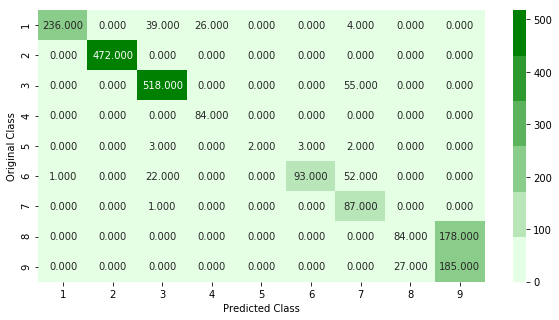

-------------------------------------------------- Precision matrix --------------------------------------------------


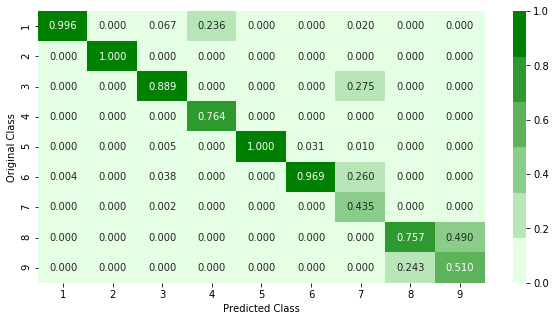

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


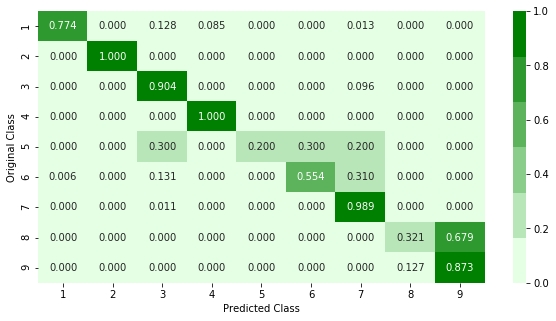

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [39]:
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

<h1 style="text-align:center;font-size:30px;" > 13.0 Modeling with ASM image features + unigram-bigram byte features + unigram ASM opcode features </h1>

## 13.1 Combining dataframes

In [59]:
result_x.head()  #this is the dataframe containing byte & asm opcode features

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...    :dword       edx       esi       eax  \
0  0.000015  0.000002  0.003440  ...  0.002550  0.002442  0.002068  0.002592   
1  0.000043  0.000221  0.000006  ...  0.009338  0.005362  0.010022  0.009385   
2  0.000094  0.000103  0.000012  ...  0.028689  0.014082  0.020146  0.021865   
3  0.000169  0.000024  0.000057  ...  0.002445  0.001336  0.001717  0.004220   
4  0.000020  0.000000  0.000555  ...  0.046795  0.033870  0.036745  0.042364   

        ebx       ecx  edi       ebp       esp       eip  
0  0.000887  0.003809  0.0  0.041667  0.000000  0.005580  
1  0.007210  0.006255  0.0  0.054348  0.000520  0.024839  
2  0.014220  0.009911  0.0  0.005435  0.000948  0.008973  
3  0.001539  0.002854  0.0  0.021739  0.000000  0.004267  
4  0.029687  0.018841  0.0  0.045290  0.000000  0.023744  

[5 rows x 550 columns]

In [61]:
#asm image features
asm_img_norm= pd.read_csv('asm_img_norm.csv', index_col=0)
asm_img_norm.head()

ID     ASM_1     ASM_3     ASM_4    ASM_14  ASM_20  \
8951  01IsoiSMh5gxyDYTl4CB  0.921053  1.000000  0.944444  0.000000     1.0   
2839  01SuzwMJEIXsK7A8dQbl  0.302632  0.277778  0.291667  0.639344     0.0   
8091  01azqd4InC7m9JpocGv5  0.302632  0.277778  0.291667  0.639344     0.0   
5182  01jsnpXSAlgw6aPeDxrU  0.302632  0.277778  0.291667  0.639344     0.0   
5926  01kcPWA9K2BOxQeS5Rju  0.302632  0.277778  0.291667  0.639344     0.0   

      ASM_21    ASM_23    ASM_24    ASM_25  ...   ASM_984   ASM_988   ASM_989  \
8951     1.0  0.605263  1.000000  0.209524  ...  0.412844  0.283186  0.037383   
2839     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
8091     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
5182     0.0  0.105263  0.043478  0.590476  ...  0.211009  0.008850  0.345794   
5926     0.0  0.105263  0.043478  0.590476  ...  0.678899  0.654867  0.560748   

       ASM_990   ASM_991   ASM_994   ASM_995   ASM_996   ASM_997   ASM_998  
8951  0.009346  0.359223  1.000000  1.000000  0.526882  0.345133  0.371429  
2839  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
8091  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
5182  1.000000  0.893204  0.441441  0.364486  0.419355  0.380531  0.371429  
5926  0.579439  0.660194  0.675676  0.214953  0.677419  0.530973  0.533333  

[5 rows x 501 columns]

In [64]:
combined = pd.merge(result_x, asm_img_norm, on='ID', how='left')
combined.head()

ae        cd        8e        ad        b5        7b     f1 b3  \
0  0.000034  0.000028  0.000015  0.000016  0.000017  0.000031  0.000000   
1  0.000040  0.000026  0.004246  0.000040  0.000033  0.000029  0.000018   
2  0.000105  0.000077  0.000111  0.000078  0.000055  0.000062  0.000000   
3  0.000142  0.000161  0.000144  0.000181  0.000132  0.000144  0.000143   
4  0.000015  0.000016  0.000015  0.000016  0.000013  0.000031  0.000018   

         a4     ff 9e     58 50  ...   ASM_984   ASM_988   ASM_989   ASM_990  \
0  0.000015  0.000002  0.003440  ...  0.211009  0.203540  0.214953  0.467290   
1  0.000043  0.000221  0.000006  ...  0.412844  0.283186  0.037383  0.009346   
2  0.000094  0.000103  0.000012  ...  0.000000  0.203540  0.214953  0.214953   
3  0.000169  0.000024  0.000057  ...  0.678899  0.654867  0.560748  0.579439   
4  0.000020  0.000000  0.000555  ...  0.678899  0.654867  0.560748  0.579439   

    ASM_991   ASM_994   ASM_995   ASM_996   ASM_997   ASM_998  
0  0.223301  0.945946  0.934579  0.946237  0.946903  0.000000  
1  0.359223  1.000000  1.000000  0.526882  0.345133  0.371429  
2  0.223301  0.630631  0.869159  1.000000  0.938053  0.876190  
3  0.660194  0.675676  0.214953  0.677419  0.530973  0.533333  
4  0.660194  0.675676  0.214953  0.677419  0.530973  0.533333  

[5 rows x 1050 columns]

In [65]:
combined['ID']

0        gyZztfseanvGp5uX2qix
1        HSpxv7XiuwNj2ceELTnJ
2        64FZCyUcjXxLNv1K8Bm3
3        H7k4tXfrKFIZN1GqnYUw
4        AjhW6ifgDC38ObQcJPa5
                 ...         
10863    b1FSAcmvx6wItGUPHoWi
10864    2wyvEnXdNFbxaAWr1Dok
10865    gBceKDhWdI6jfzpsMNm5
10866    ENo8Xj5AOMHw2LDQuYB3
10867    cxCflUQEJT7mNFg08KpM
Name: ID, Length: 10868, dtype: object

In [76]:
combined.to_csv('unibi_byte+asm+image.csv')

## 13.2 Splitting the data

In [77]:
data_y

array([6, 2, 2, ..., 3, 2, 1])

In [78]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(combined.drop(['ID'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train_combo, X_cv_combo, y_train_combo, y_cv_combo = train_test_split(X_train_combo, y_train_combo,stratify=y_train_combo,test_size=0.20)

In [79]:
print('Number of data points in train data:', X_train_combo.shape[0])
print('Number of data points in test data:', X_test_combo.shape[0])
print('Number of data points in cross validation data:', X_cv_combo.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [80]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)

    
    B =(C/C.sum(axis=0))

    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

## 13.3 XGBoost with hyperparameter tuning

In [81]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from datetime import datetime
start = datetime.now()

x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train_combo.values,y_train_combo)
print('Time taken :', datetime.now() - start)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 12.8min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 14.4min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 17.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.1min finished


Time taken : 0:28:05.663621


In [82]:
random_cfl1.best_params_

{'colsample_bytree': 0.1,
 'learning_rate': 0.15,
 'max_depth': 3,
 'n_estimators': 2000,
 'subsample': 1}

In [83]:
from datetime import datetime
start = datetime.now()

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=0.1, max_depth=3,subsample= 1)
x_cfl.fit(X_train_combo.values,y_train_combo)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_combo,y_train_combo)

predict_y = c_cfl.predict_proba(X_train_combo)
print ('Train loss:',log_loss(y_train_combo, predict_y))
predict_y = c_cfl.predict_proba(X_cv_combo)
print ('CV loss:',log_loss(y_cv_combo, predict_y))
predict_y = c_cfl.predict_proba(X_test_combo)
print ('Test loss:',log_loss(y_test_combo, predict_y))
print('Time taken :', datetime.now() - start)

Train loss: 0.00746793310483648
CV loss: 0.021801086520724454
Test loss: 0.015834011883735746
Time taken : 0:30:23.601554


Number of misclassified points  0.22999080036798528
-------------------------------------------------- Confusion matrix --------------------------------------------------


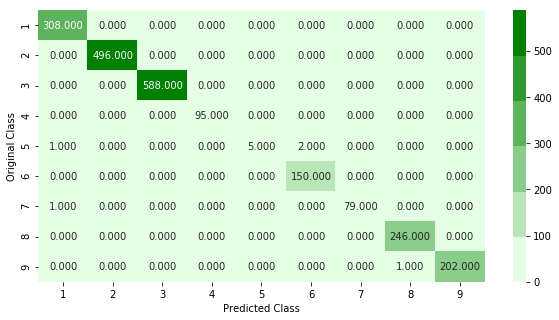

-------------------------------------------------- Precision matrix --------------------------------------------------


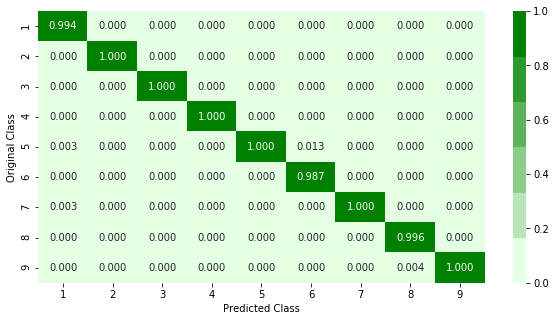

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


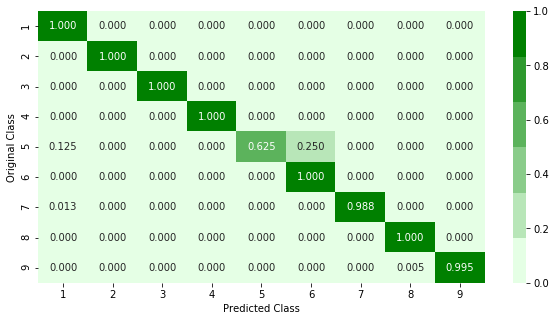

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [84]:
plot_confusion_matrix(y_test_combo, c_cfl.predict(X_test_combo))

<h1 style="text-align:center;font-size:30px;" > 14.0 Summary & Conclusions </h1>

## 14.1 Summary 

In [26]:
#Ref: http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
print('Summary')
x.field_names = ["Model","Features","Test log-loss" ,"Misclassification rate"]
x.add_row(["Random", 'NIL', 2.50, '89%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["K-NN", 'Byte-Unigram', 0.248, '4.5%'])
x.add_row(["Logistic regression", 'Byte-Unigram', 0.528, '12.32%'])
x.add_row(["Random Forest", 'Byte-Unigram', 0.085, '2.02%'])
x.add_row(["XGBoost", 'Byte-Unigram', 0.079, '1.24%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["K-NN", 'ASM-Opcode-Unigram', 0.089, '2.02%'])
x.add_row(["Logistic regression", 'ASM-Opcode-Unigram', 0.415, '9.61%'])
x.add_row(["Random Forest", 'ASM-Opcode-Unigram', 0.057, '1.15%'])
x.add_row(["XGBoost", 'ASM-Opcode-Unigram', 0.049, '0.87%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["Random Forest", 'Byte-Unigram + ASM-Opcode-Unigram', 0.040, '<1%'])
x.add_row(["XGBoost", 'Byte-Unigram + ASM-Opcode-Unigram', 0.031, '<1%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["K-NN", 'Byte-Unigram + Byte-Bigram', 0.247, '6.16%'])
x.add_row(["Logistic regression", 'Byte-Unigram + Byte-Bigram', 0.754, '18.62%'])
x.add_row(["Random Forest", 'Byte-Unigram + Byte-Bigram', 0.040, '0.73%'])
x.add_row(["XGBoost", 'Byte-Unigram + Byte-Bigram', 0.036, '0.59%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["Random Forest", 'Byte-Unigram + Byte-Bigram + ASM-Opcode-Unigram', 0.033, '<1%'])
x.add_row(["XGBoost", 'Byte-Unigram + Byte-Bigram + ASM-Opcode-Unigram', 0.018, '<1%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["XGBoost", 'ASM Image', 0.393, '18.99%'])
x.add_row(["--------------------", "-----------------------------------------------------------", "------------", "----------------------"])
x.add_row(["XGBoost", 'Byte-Unigram + Byte-Bigram + ASM-Opcode-Unigram + ASM Image', 0.015, '0.22%'])

print(x)

Summary
+----------------------+-------------------------------------------------------------+---------------+------------------------+
|        Model         |                           Features                          | Test log-loss | Misclassification rate |
+----------------------+-------------------------------------------------------------+---------------+------------------------+
|        Random        |                             NIL                             |      2.5      |          89%           |
| -------------------- | ----------------------------------------------------------- |  ------------ | ---------------------- |
|         K-NN         |                         Byte-Unigram                        |     0.248     |          4.5%          |
| Logistic regression  |                         Byte-Unigram                        |     0.528     |         12.32%         |
|    Random Forest     |                         Byte-Unigram                        |     0.085

## 14.2 Conclusion 

- Random forest & XGBoost models applied on unigram & bigram byte features had significantly low log loss compared to models on unigram byte features
- XGBoost applied on Byte-Unigram + Byte-Bigram + ASM-Opcode-Unigram features resulted in a low log loss of 0.018
- Finally, the XGBoost model on Byte-Unigram + Byte-Bigram + ASM-Opcode-Unigram + ASM Image was the best because the log loss of 0.015 & Misclassification rate of 0.22% obtained was the least compared to any other model applied on different combination of features